In [827]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.ticker import MultipleLocator

In [577]:
df = pd.read_excel('zonaltest_res.xlsx', sheet_name='org_data')

## All plots and figures in the Zonal Greenness Analysis

In [578]:
#df.describe()
#df.nunique()
df.value_counts()

Reg      T1          Detection   HIDP        Area  Z1_count  Z1_sum         NONE       Z2_count     Z2_sum        AT         Z3_count   Z3_sum       DET       Z4_count  Z4_sum       B40       AT - NONE  DET - AT  DET - B40  B40 - AT
Lyngen   2019-04-09  <25% false  EXCLUDED_F  L6    37827      2214.921342    0.058554  192094.2545   11383.81826   0.059262  734.0000   320.457721   0.436591  963       257.888895   0.267797   0.000708  0.377329  0.168794   0.208536    1
Romsdal  2020-02-14  False       INCLUDED_F  R4    57212      4661.857793    0.081484  265726.0000   23377.30000   0.087975  3634.0000  1537.262920  0.423022  3926      856.877575   0.218257   0.006491  0.335047  0.204765   0.130282    1
                                             R1    251789     23704.960710   0.094146  328826.0000   30484.30000   0.092706  2746.0000  1443.955380  0.525840  3230      1230.425853  0.380937  -0.001440  0.433133  0.144903   0.288230    1
                     <25% false  EXCLUDED_F  R6    35

In total 96 datapoints. 6 datapoints with Nan -> Removed. 

In [579]:
#df = df[df['Z3_count'] != 0]
#df.describe()
df.nunique()
#df.value_counts()


Reg           2
T1           16
Detection     4
HIDP          4
Area         12
Z1_count     96
Z1_sum       96
NONE         96
Z2_count     96
Z2_sum       96
AT           96
Z3_count     90
Z3_sum       91
DET          90
Z4_count     91
Z4_sum       91
B40          90
AT - NONE    96
DET - AT     90
DET - B40    90
B40 - AT     90
dtype: int64

After removing of nan, total datapoints = 90. 90 unique data values in all columns except Z3_count, as two areas has the same pixelcount in zone 3. Sum differs, aka different Z3. 

### Demonstration of difference from zone to zone (before removing 25th)

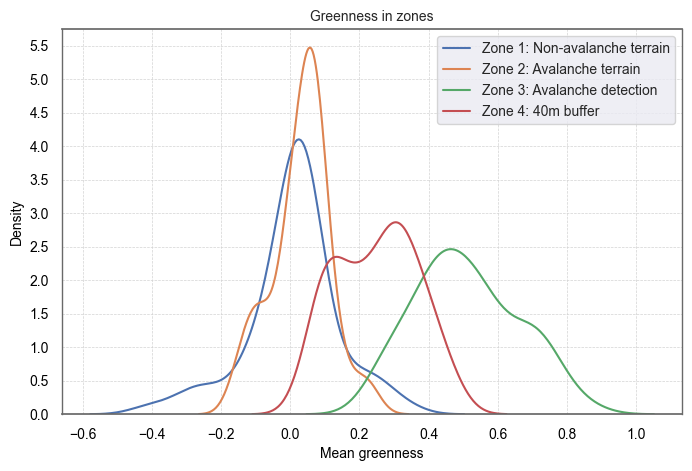

In [831]:
## Looks for differences in zonal greenness distribution = KDE plot all

fig, axs = plt.subplots(figsize=(8, 5))

ax = sns.kdeplot(df['NONE'], label='Zone 1: Non-avalanche terrain')
ax = sns.kdeplot(df['AT'], label='Zone 2: Avalanche terrain')
ax = sns.kdeplot(df['DET'], label='Zone 3: Avalanche detection')
ax = sns.kdeplot(df['B40'], label='Zone 4: 40m buffer')

plt.title('Greenness in zones',fontsize=10)
plt.xlabel('Mean greenness', fontsize=10)
plt.ylabel('Density', fontsize=10)

ax.set_facecolor('white')
#Constant plot values
plt.legend(prop={'size': 10})
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

plt.show()

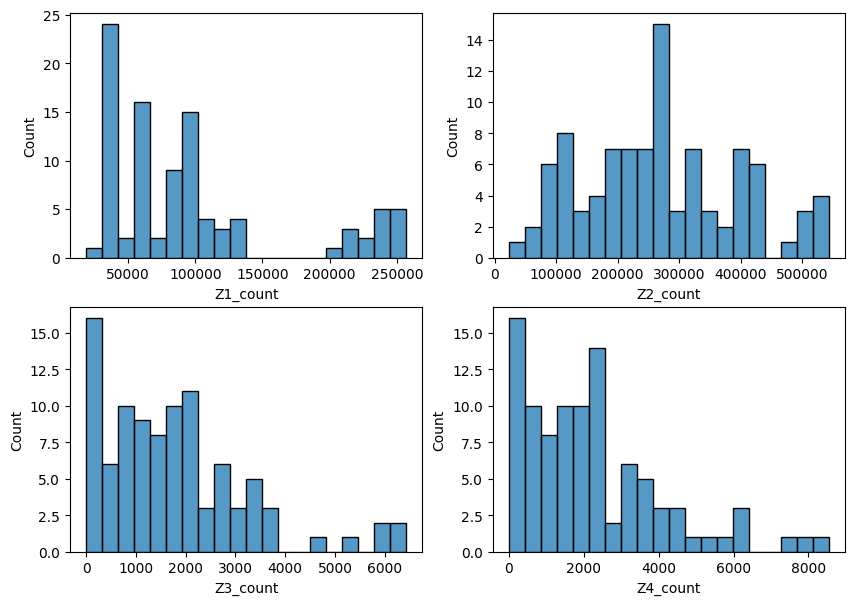

In [581]:
## Looks for differences in zonal greenness distribution BETWEEN TRUE AND FALSE IMAGES

fig, axs = plt.subplots(2,2, figsize=(10,7))

ax = sns.histplot(data=df, x='Z1_count', ax=axs[0,0], bins=20)
ax = sns.histplot(data=df, x='Z2_count', ax=axs[0,1], bins=20)
ax = sns.histplot(data=df, x='Z3_count', ax=axs[1,0], bins=20)
ax = sns.histplot(data=df, x='Z4_count', ax=axs[1,1], bins=20)

plt.show()

#kdeplot filll=True
#histplot fill=True, bins=20)

In [582]:
df['Z3_count'].describe()

count      96.000000
mean     1764.736255
std      1457.774916
min         0.000000
25%       708.250000
50%      1538.500000
75%      2378.000000
max      6429.000000
Name: Z3_count, dtype: float64

### Marking high-influential data (small pixel count)

In [583]:
#Updating original dataframe with values over 25th precentile

df_HIDP = df

df = df[df['Z3_count'] >= 751.5]

In [584]:
df_HIDP.describe()

Z1_count        Z1_sum       NONE       Z2_count         Z2_sum  \
count      96.000000     96.000000  96.000000      96.000000      96.000000   
mean    98078.864583   -862.040618  -0.000877  268522.418191    6712.791557   
std     68029.438058  19941.253083   0.156416  126377.248556   26490.460832   
min     18741.000000 -90247.406300  -0.418100   23152.400000  -56919.701870   
25%     41697.250000  -3199.830793  -0.061764  176045.604725   -5493.518668   
50%     86033.000000   1324.090090   0.020302  259233.441350    6133.768998   
75%    106548.750000   5332.373494   0.061517  345355.570150   21784.937363   
max    256975.000000  72966.625370   0.504300  543593.850000  118900.232800   

              AT     Z3_count       Z3_sum        DET     Z4_count  \
count  96.000000    96.000000    96.000000  90.000000    96.000000   
mean    0.021403  1764.736255   902.798033   0.502576  2195.989583   
std     0.102988  1457.774916   842.179430   0.152078  1862.595063   
min    -0.258234     0.000000     0.000000   0.183542     0.000000   
25%    -0.024276   708.250000   298.376581   0.402894   812.250000   
50%     0.036205  1538.500000   729.970542   0.497570  1872.500000   
75%     0.080448  2378.000000  1301.867460   0.586381  3088.750000   
max     0.326480  6429.000000  4673.680000   0.923795  8549.000000   

            Z4_sum        B40  AT - NONE   DET - AT  DET - B40   B40 - AT  
count    96.000000  90.000000  96.000000  90.000000  90.000000  90.000000  
mean    508.093320   0.228536   0.022280   0.481969   0.274799   0.207929  
std     471.643702   0.184634   0.080886   0.174793   0.163812   0.146762  
min    -158.322522  -0.719648  -0.177820   0.171269   0.073462  -0.512452  
25%     168.218397   0.129325  -0.016873   0.360739   0.179279   0.121226  
50%     404.488078   0.248810   0.013838   0.451404   0.222748   0.210938  
75%     785.074885   0.330853   0.048398   0.608488   0.335378   0.282394  
max    2311.402200   0.717623   0.319852   0.944072   1.267947   0.689761

In [585]:
df.nunique()

Reg           2
T1           16
Detection     2
HIDP          2
Area         10
Z1_count     67
Z1_sum       67
NONE         67
Z2_count     67
Z2_sum       67
AT           67
Z3_count     67
Z3_sum       67
DET          67
Z4_count     67
Z4_sum       67
B40          67
AT - NONE    67
DET - AT     67
DET - B40    67
B40 - AT     67
dtype: int64

## Results

### Differences in zonal greenness AFTER removing

In [586]:
df['Detection'].describe()

count        67
unique        2
top       False
freq         41
Name: Detection, dtype: object

In [711]:
df.loc[df['Detection'] == 'True'].describe()

Z1_count        Z1_sum       NONE       Z2_count        Z2_sum  \
count      26.000000     26.000000  26.000000      26.000000     26.000000   
mean    95562.230769  -1804.064443  -0.030767  310773.341377    936.439641   
std     61670.085605  16654.530431   0.135884   93994.628209  23178.954527   
min     35517.000000 -60895.734540  -0.409464  126017.000000 -46359.600000   
25%     55745.250000  -4563.038191  -0.076495  254591.907900 -11813.038595   
50%     86033.000000    313.042426   0.005144  287742.089700   2305.344076   
75%    100428.250000   4228.974659   0.043234  382880.315275  12145.034515   
max    246143.000000  35873.681390   0.174360  524886.847600  41587.800000   

              AT     Z3_count       Z3_sum        DET     Z4_count  \
count  26.000000    26.000000    26.000000  26.000000    26.000000   
mean    0.007644  2420.692308  1476.282359   0.603466  2726.884615   
std     0.074874  1453.920487   975.792968   0.167653  1678.400222   
min    -0.155747   910.000000   298.438662   0.273609  1064.000000   
25%    -0.024159  1453.250000   762.633665   0.460279  1572.500000   
50%     0.007923  1947.500000  1312.386640   0.652105  2209.500000   
75%     0.044033  3108.750000  1938.265108   0.711545  3257.750000   
max     0.151761  6429.000000  4673.680000   0.860086  7889.000000   

            Z4_sum        B40  AT - NONE   DET - AT  DET - B40   B40 - AT  
count    26.000000  26.000000  26.000000  26.000000  26.000000  26.000000  
mean    678.318977   0.257092   0.038411   0.595821   0.349001   0.249447  
std     543.452595   0.142986   0.084991   0.173774   0.091908   0.124325  
min      52.217575   0.040479  -0.070722   0.263187   0.199687   0.057999  
25%     284.164604   0.114024  -0.010804   0.483012   0.282504   0.129055  
50%     565.075776   0.278312   0.011899   0.612890   0.337579   0.265749  
75%     871.670341   0.380909   0.084074   0.687796   0.392586   0.330558  
max    2311.402200   0.475190   0.319852   0.944072   0.566435   0.521117

In [985]:
df_stats = df.describe()
print(df_stats.to_latex())

\begin{tabular}{lrrrrrrrrrrrrrrrr}
\toprule
{} &       Z1\_count &        Z1\_sum &       NONE &       Z2\_count &         Z2\_sum &         AT &     Z3\_count &       Z3\_sum &        DET &     Z4\_count &       Z4\_sum &        B40 &  AT - NONE &   DET - AT &  DET - B40 &   B40 - AT \\
\midrule
count &      67.000000 &     67.000000 &  67.000000 &      67.000000 &      67.000000 &  67.000000 &    67.000000 &    67.000000 &  67.000000 &    67.000000 &    67.000000 &  67.000000 &  67.000000 &  67.000000 &  67.000000 &  67.000000 \\
mean  &   90416.119403 &    813.411091 &   0.008432 &  319879.390175 &    9518.350379 &   0.031416 &  2378.025082 &  1223.930085 &   0.510803 &  2957.462687 &   689.209596 &   0.249122 &   0.022984 &   0.479387 &   0.262701 &   0.217706 \\
std   &   56974.163642 &  13716.590870 &   0.130699 &  104806.100754 &   28031.549496 &   0.083726 &  1327.296896 &   816.348816 &   0.148392 &  1728.769902 &   447.648312 &   0.116100 &   0.073616 &   0.169480 &   0.10089

/var/folders/bs/rjz55_zs4rncnjv_rr32wdg40000gn/T/ipykernel_59059/4227793120.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_stats.to_latex())


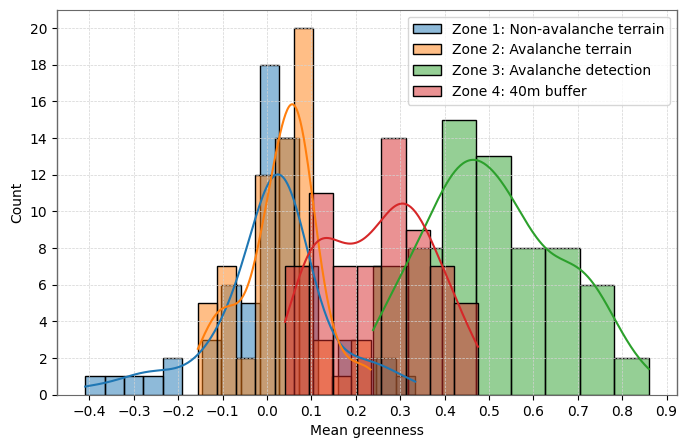

In [587]:
fig, axs = plt.subplots(figsize=(8, 5))

ax = sns.histplot(df['NONE'], label='Zone 1: Non-avalanche terrain', fill=True, kde=True)
ax = sns.histplot(df['AT'], label='Zone 2: Avalanche terrain', fill=True, kde=True)
ax = sns.histplot(df['DET'], label='Zone 3: Avalanche detection', fill=True, kde=True)
ax = sns.histplot(df['B40'], label='Zone 4: 40m buffer', fill=True, kde=True)

plt.xlabel('Mean greenness', fontsize=10)

#Constant plot values
plt.legend(prop={'size': 10})
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=0)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

plt.show()

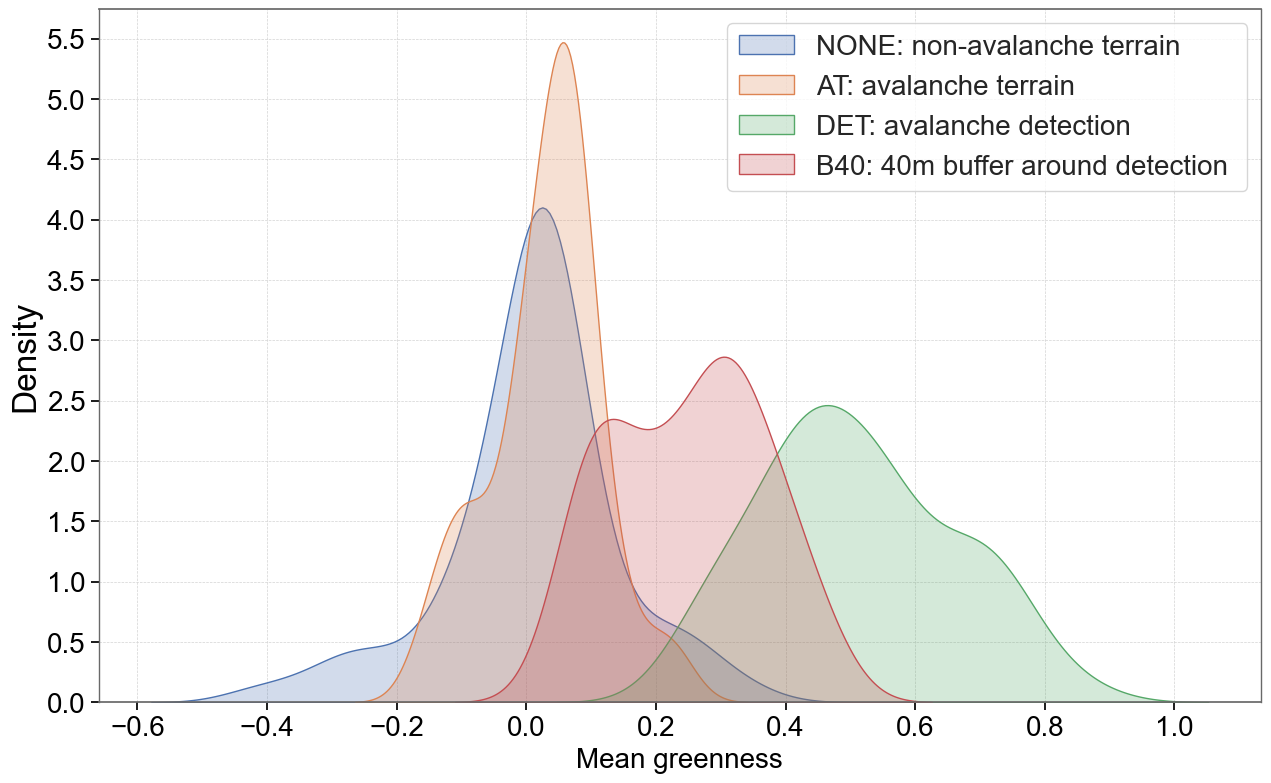

In [964]:
fig, axs = plt.subplots(figsize=(15,9))

ax = sns.kdeplot(df['NONE'], label='NONE: non-avalanche terrain', fill=True)
ax = sns.kdeplot(df['AT'], label='AT: avalanche terrain', fill=True)
ax = sns.kdeplot(df['DET'], label='DET: avalanche detection', fill=True)
ax = sns.kdeplot(df['B40'], label='B40: 40m buffer around detection ', fill=True)

plt.xlabel('Mean greenness', fontsize=20)

#Constant plot values
plt.legend(prop={'size': 20})
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=20)

plt.show()

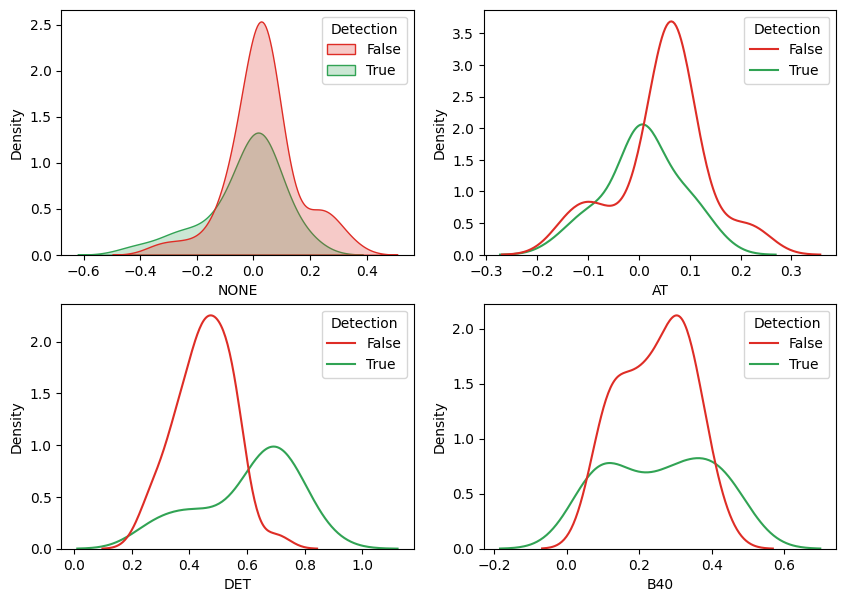

In [589]:
fig, axs = plt.subplots(2,2, figsize=(10,7))

ax = sns.kdeplot(data=df, x='NONE', hue='Detection', ax=axs[0,0], palette=['#de2d26', '#31a354'], fill=True)
ax = sns.kdeplot(data=df, x='AT', hue='Detection', ax=axs[0,1], palette=['#de2d26', '#31a354'])
ax = sns.kdeplot(data=df, x='DET', hue='Detection', ax=axs[1,0], palette=['#de2d26', '#31a354'])
ax = sns.kdeplot(data=df, x='B40', hue='Detection', ax=axs[1,1], palette=['#de2d26', '#31a354'])

plt.show()

#### Relations

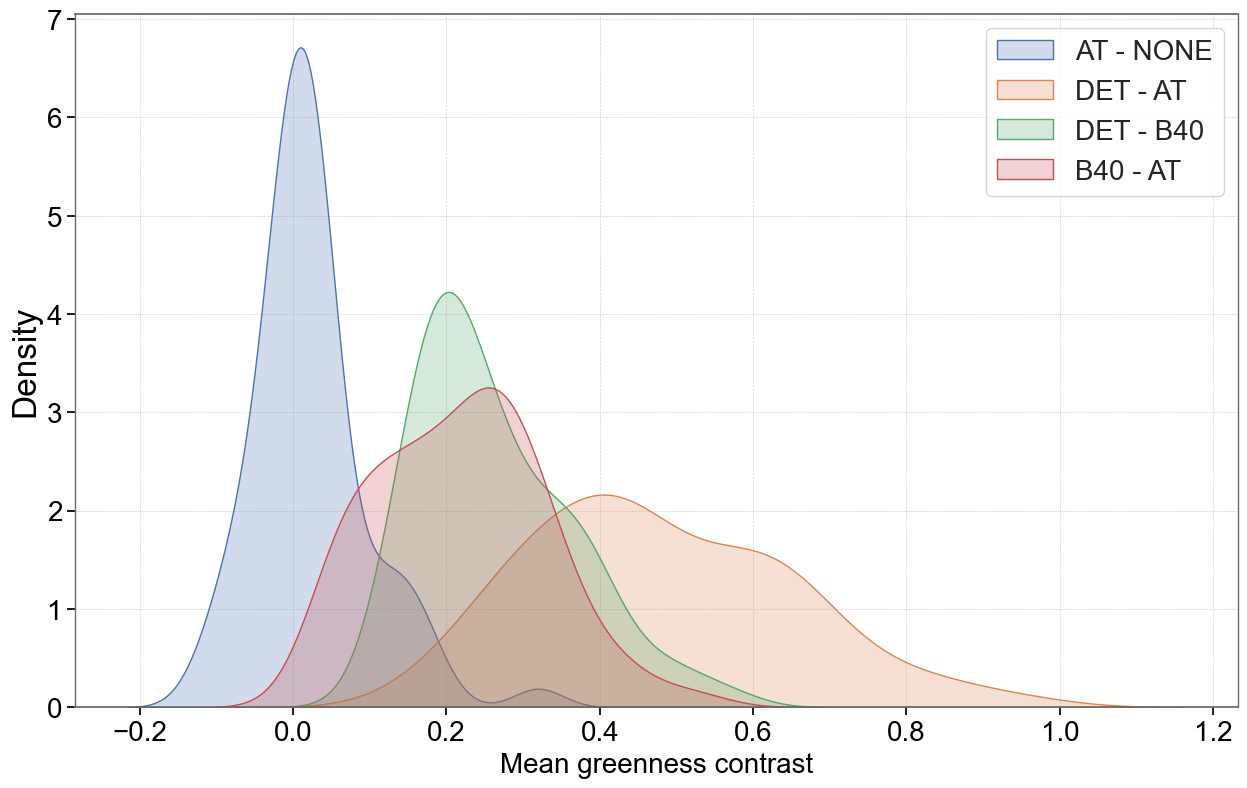

In [978]:
fig, axs = plt.subplots(figsize=(15,9))

ax = sns.kdeplot(df['AT - NONE'], label='AT - NONE', fill=True)
ax = sns.kdeplot(df['DET - AT'], label='DET - AT', fill=True)
ax = sns.kdeplot(df['DET - B40'], label='DET - B40', fill=True)
ax = sns.kdeplot(df['B40 - AT'], label='B40 - AT', fill=True)

#plt.title('Greenness in zones',fontsize=10)
plt.xlabel('Mean greenness contrast', fontsize=20)
#plt.ylabel('Density', fontsize=10)

#Constant plot values
plt.legend(prop={'size': 20})
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=20)

plt.show()

### Pairplots

In [591]:
#df_w.head()

import seaborn.objects as so

In [592]:
#Variables

v1 = ["NONE", "AT", "DET", "B40"]
v2 = ["AT - NONE", "DET - AT", "DET - B40", "B40 - AT"]

v3 = ["NONE", "AT", "DET", "B40", "AT - NONE", "DET - AT", "DET - B40", "B40 - AT"]

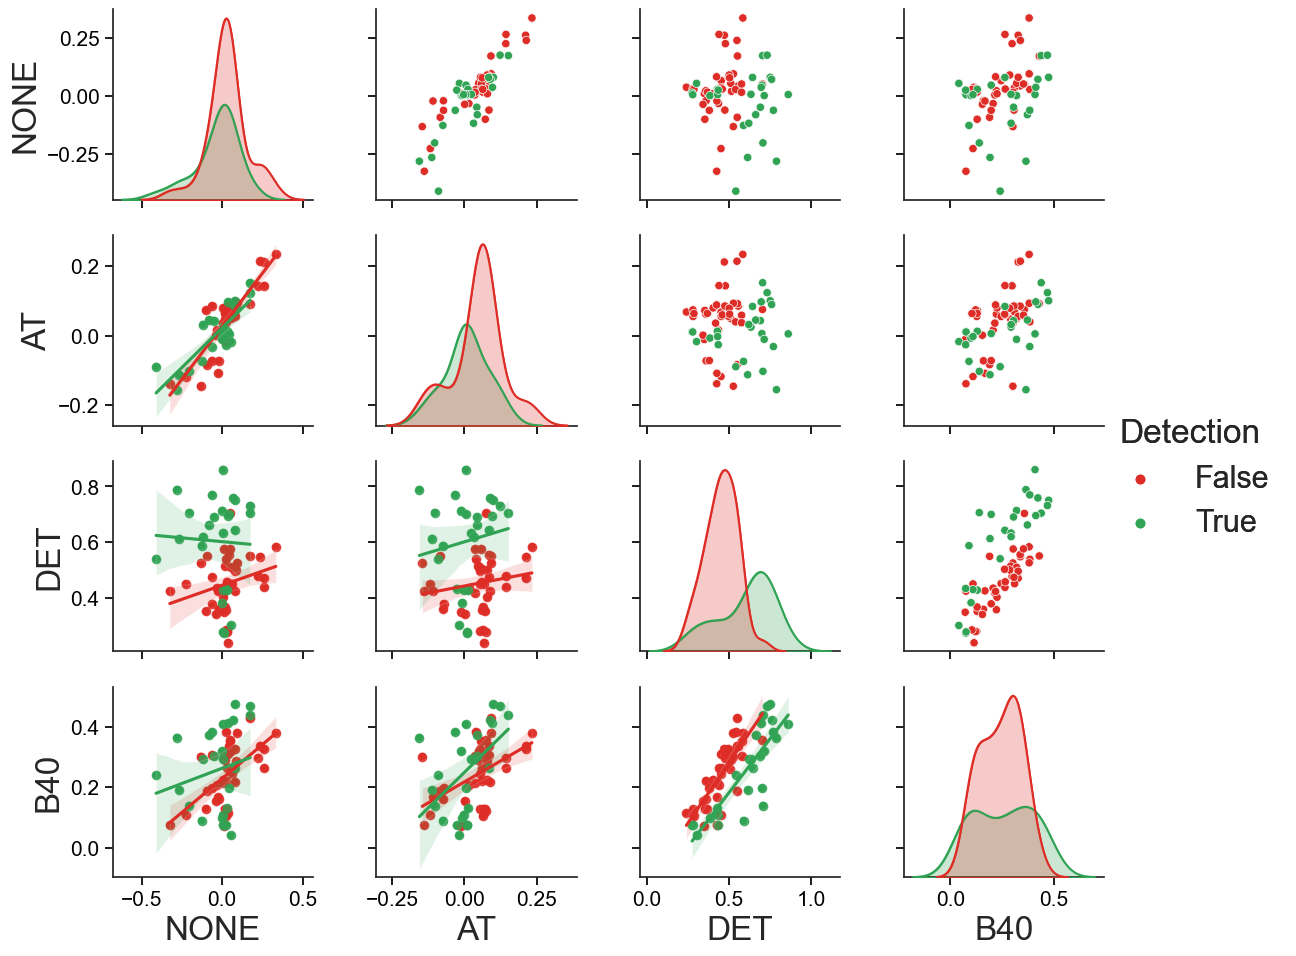

In [974]:


p = sns.pairplot(df, hue='Detection', vars=v1, palette=['#de2d26', '#31a354'])
p.map_diag(sns.kdeplot)
p.map_lower(sns.regplot)
p.map_upper(sns.scatterplot)
p.add_legend()
p.tick_params(axis='both')

p.tick_params(colors='black', which='both', labelsize=15)

plt.show()

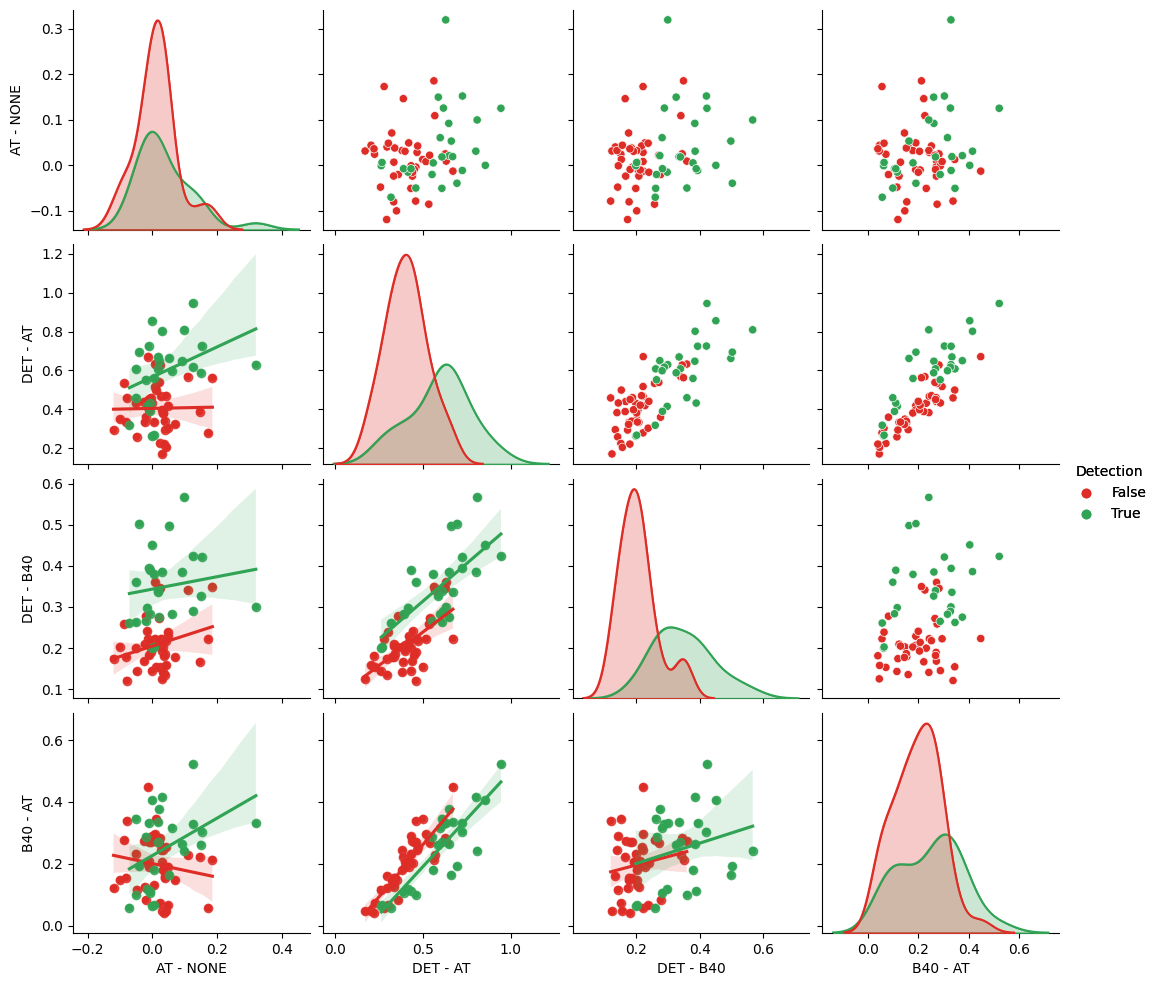

In [594]:

p = sns.pairplot(df, hue='Detection', vars=v2, palette=['#de2d26', '#31a354'])
p.map_diag(sns.kdeplot)
p.map_lower(sns.regplot)
p.map_upper(sns.scatterplot)
p.add_legend()
p.tick_params(axis='both')

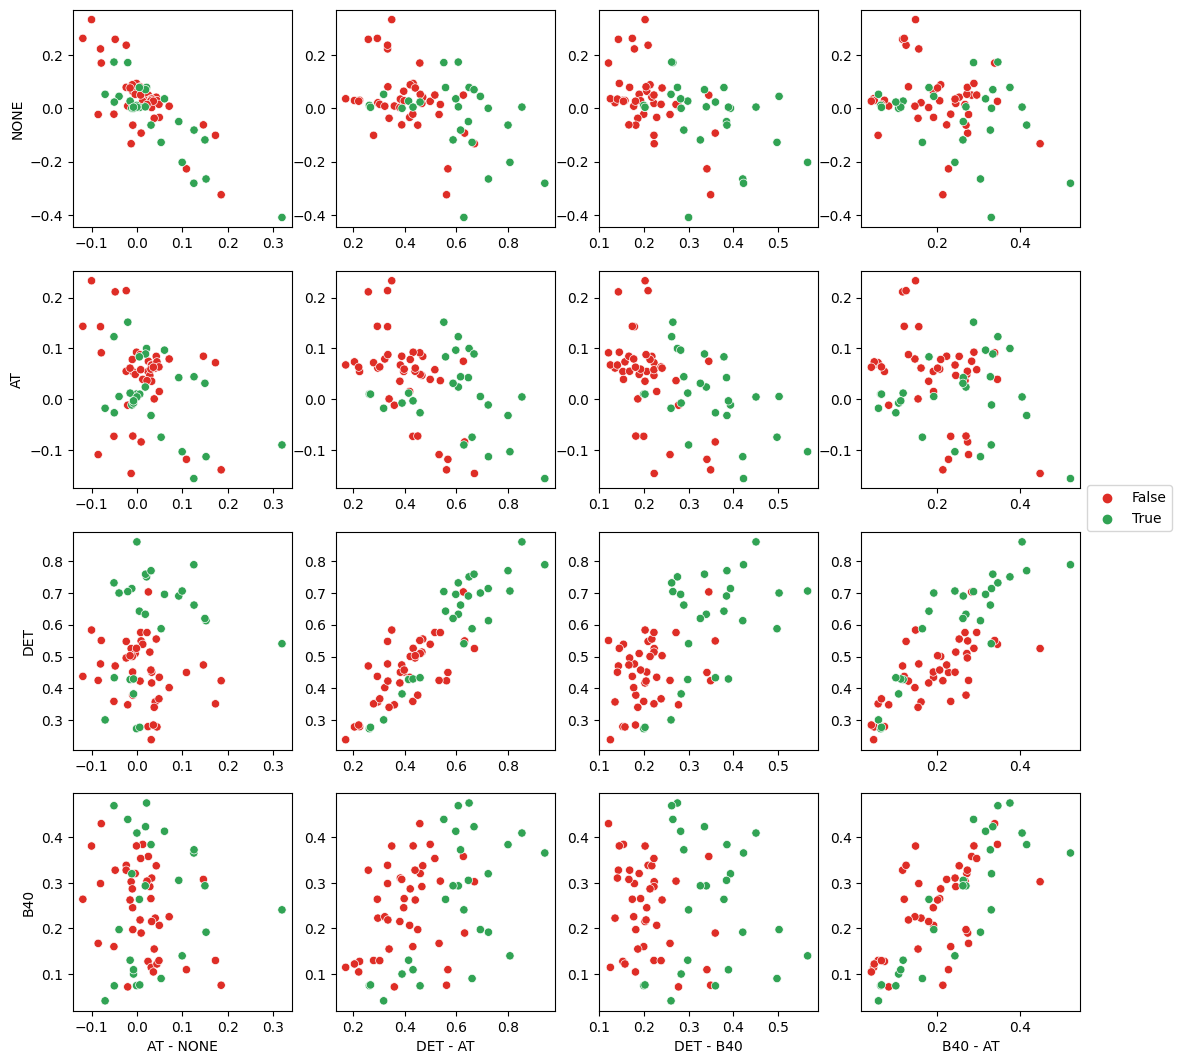

In [595]:
# ZONES vs DIFFERS

fig, axs = plt.subplots(4,4, figsize=(13,13))


ax = sns.scatterplot(data=df, y='NONE', x='AT - NONE', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[0,0], legend=False)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='NONE', x='DET - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[0,1], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='NONE', x='DET - B40', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[0,2], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='NONE', x='B40 - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[0,3], legend=False)
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(ylabel=None)
ax.set(xlabel=None)



#fig, axs = plt.subplots(1,4, figsize=(13,3))
ax = sns.scatterplot(data=df, y='AT', x='AT - NONE', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[1,0], legend=False)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='AT', x='DET - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[1,1], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='AT', x='DET - B40', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[1,2], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='AT', x='B40 - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[1,3], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)



#fig, axs = plt.subplots(1,4, figsize=(13,3))
ax = sns.scatterplot(data=df, y='DET', x='AT - NONE', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[2,0], legend=False)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='DET', x='DET - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[2,1], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='DET', x='DET - B40', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[2,2], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)
ax = sns.scatterplot(data=df, y='DET', x='B40 - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[2,3], legend=False)
ax.set(ylabel=None)
ax.set(xlabel=None)


#fig, axs = plt.subplots(1,4, figsize=(13,3))
ax = sns.scatterplot(data=df, y='B40', x='AT - NONE', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[3,0], legend=False)
ax = sns.scatterplot(data=df, y='B40', x='DET - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[3,1], legend=False)
ax.set(ylabel=None)
ax = sns.scatterplot(data=df, y='B40', x='DET - B40', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[3,2], legend=False)
ax.set(ylabel=None)
ax = sns.scatterplot(data=df, y='B40', x='B40 - AT', hue='Detection', palette=['#de2d26', '#31a354'], ax=axs[3,3])
ax.legend(loc='center left', bbox_to_anchor=(1, 2.31))
ax.set(ylabel=None)

plt.show()

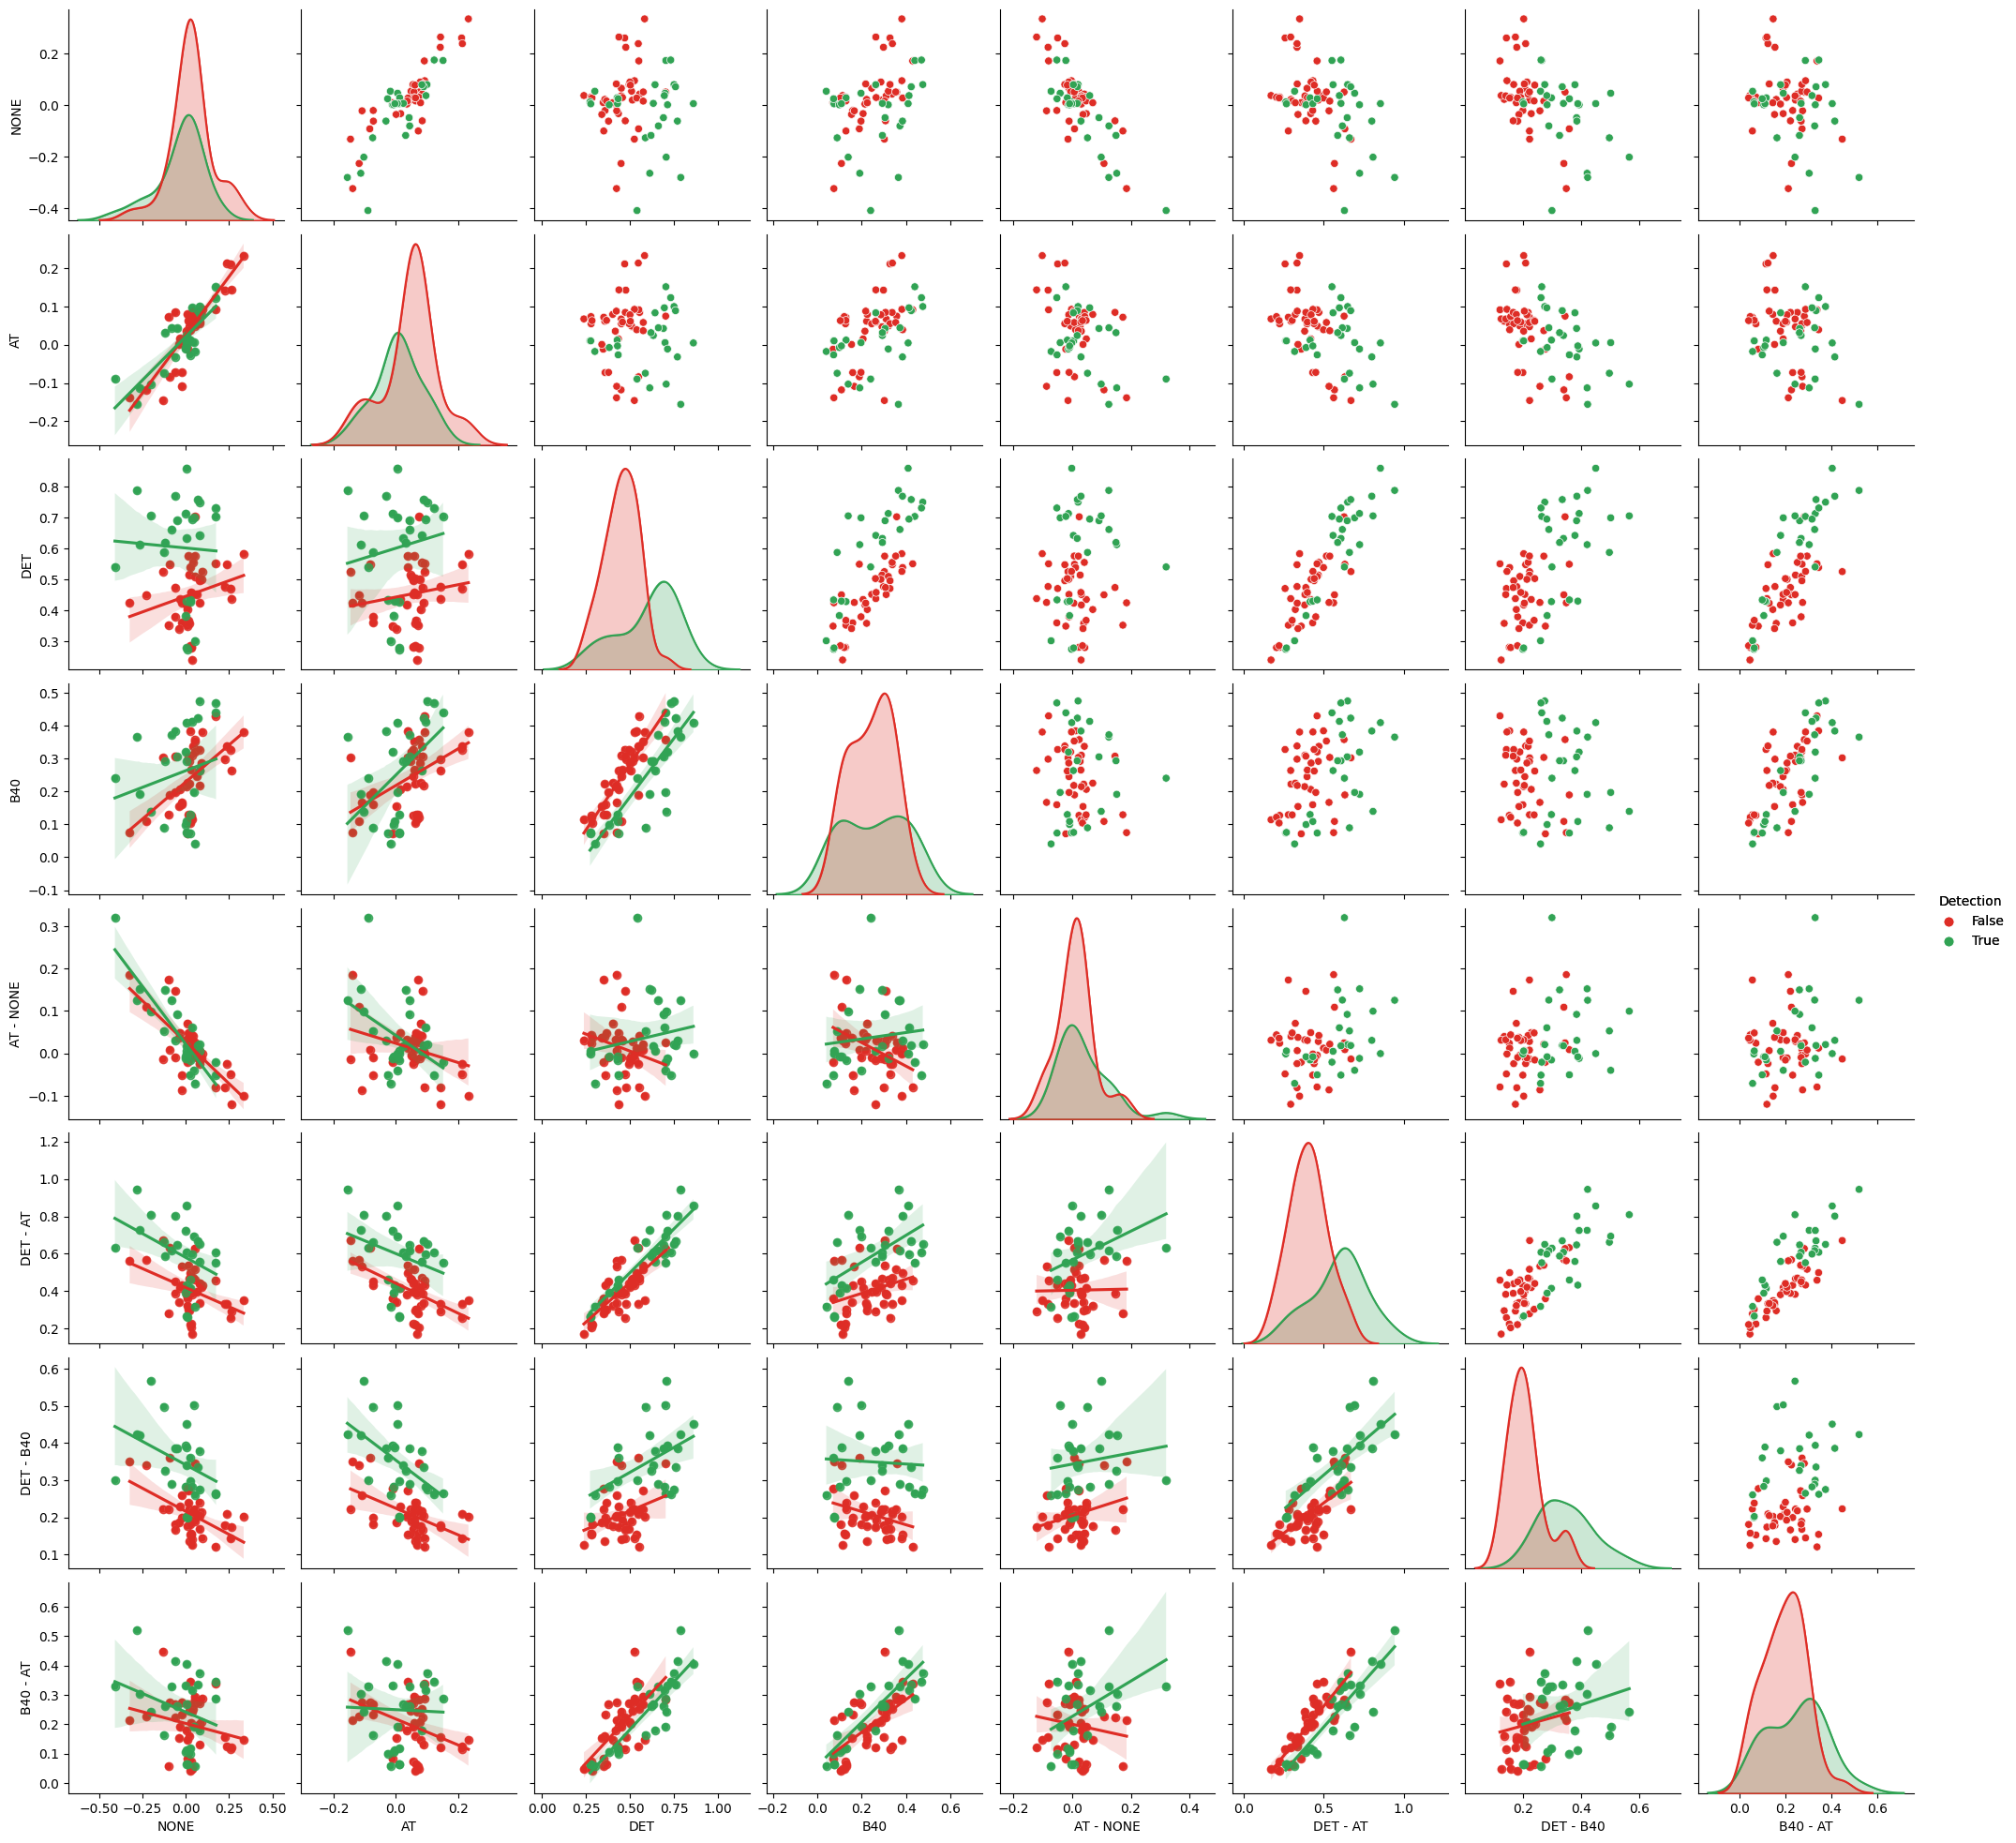

In [596]:
p = sns.pairplot(df, hue='Detection', vars=v3, palette=['#de2d26', '#31a354'])
p.map_diag(sns.kdeplot)
p.map_lower(sns.regplot)
p.map_upper(sns.scatterplot)
p.add_legend()
p.tick_params(axis='both')

plt.show()

### Boxplots

In [597]:

df_box_z = pd.melt(df, value_vars=['NONE', 'AT', 'DET', 'B40'], id_vars='Detection',
             var_name='Zone', value_name="Mean greenness")


df_box_z.head(500)

Detection  Zone  Mean greenness
0       False  NONE       -0.132479
1       False  NONE       -0.092552
2       False  NONE        0.050150
3       False  NONE       -0.033520
4       False  NONE        0.009258
..        ...   ...             ...
263      True   B40        0.293318
264      True   B40        0.413107
265      True   B40        0.108782
266      True   B40        0.383763
267      True   B40        0.073502

[268 rows x 3 columns]

In [981]:


df_box_d = pd.melt(df, value_vars=['AT - NONE', 'DET - AT', 'DET - B40', 'B40 - AT'], id_vars='Detection',
             var_name='Zone', value_name='Mean greenness contrast')


df_box_d.head(500)

df_box_two = pd.melt(df, value_vars=['DET - AT', 'DET - B40'], id_vars='Detection',
             var_name='Zone', value_name='Mean greenness contrast')

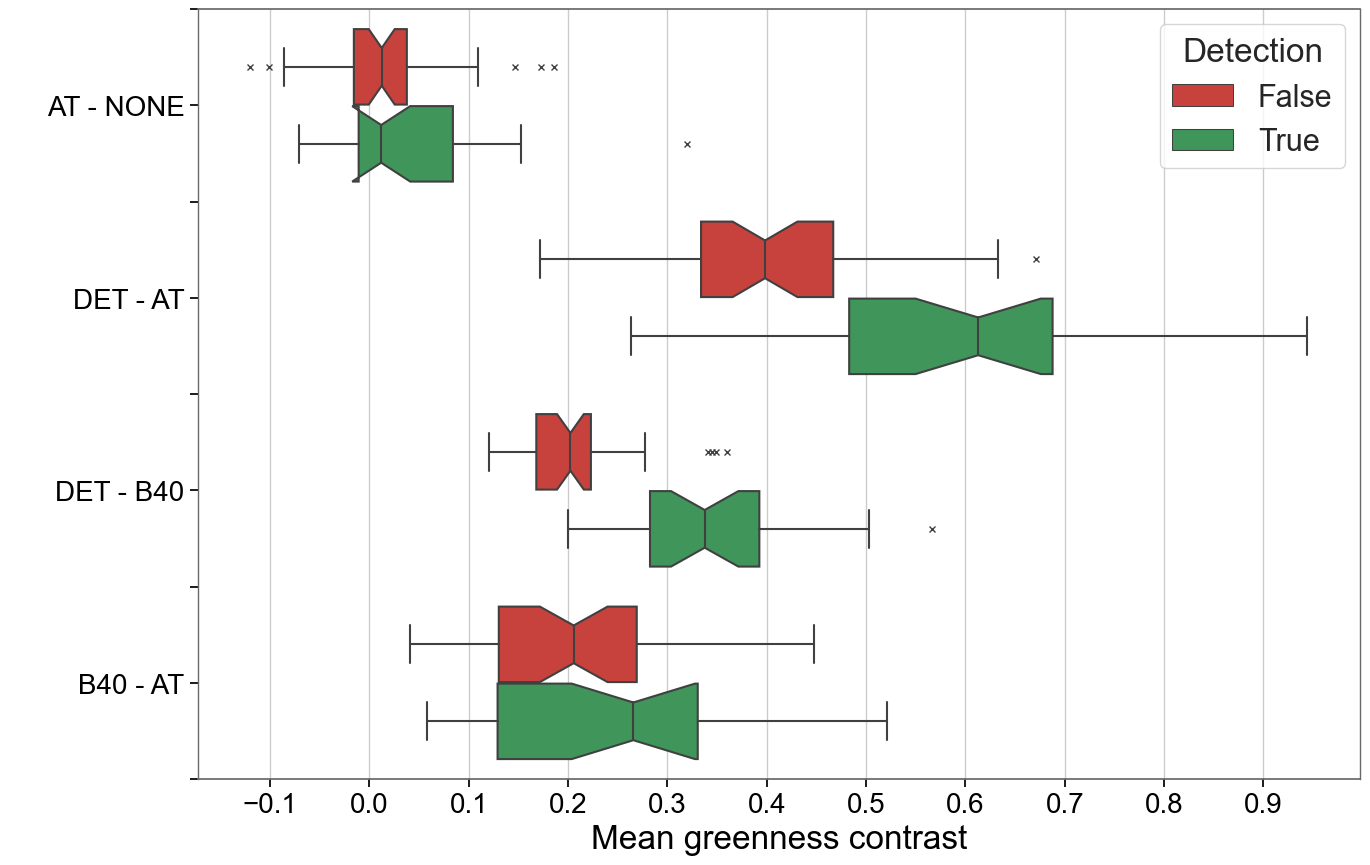

In [983]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(data=df_box_d, x='Mean greenness contrast', y="Zone", hue="Detection", palette=['#de2d26', '#31a354'], notch=True, flierprops={"marker": "x"})

ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_linewidth(1)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=20)
ax.xaxis.grid(True)
ax.set_ylabel(' ')
ax.set_axisbelow(True)



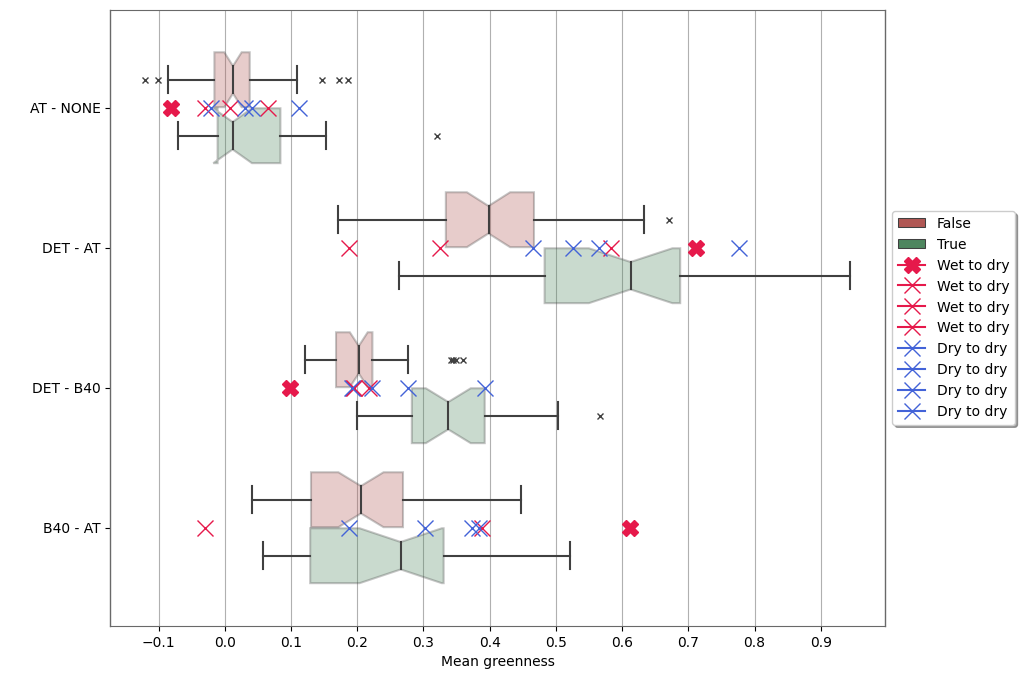

In [780]:
fig, ax = plt.subplots(figsize=(10,8))

sns.boxplot(data=df_box_d, x='Mean greenness', y="Zone", hue="Detection", palette=['#de2d26', '#31a354'], saturation=0.5, boxprops=dict(alpha=.3), notch=True, flierprops={"marker": "x"})


#L1 310519_0511
ax.plot(-0.080710105, 0, label='Wet to dry', color='#e6194B', marker='X', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.711574195, 1, color='#e6194B', marker='X', markersize=12)
ax.plot(0.099242173, 2, color='#e6194B', marker='X', markersize=12)
ax.plot(0.612332022, 3, color='#e6194B', marker='X', markersize=12)

#L1 300320_1559
ax.plot(0.065825369, 0, label='Wet to dry', color='#e6194B', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.583051816, 1, color='#e6194B', marker='x', markersize=12)
ax.plot(0.194326546, 2, color='#e6194B', marker='x', markersize=12)
ax.plot(0.38872527, 3, color='#e6194B', marker='x', markersize=12)

#R3 140220_0554
ax.plot(-0.029738061, 0, label='Wet to dry', color='#e6194B', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.324855561, 1, color='#e6194B', marker='x', markersize=12)
ax.plot(0.195208898, 2, color='#e6194B', marker='x', markersize=12)
ax.plot(0.129646662, 3, color='#e6194B', marker='', markersize=12)

#R3 090419_1703
ax.plot(0.008344083, 0, label='Wet to dry', color='#e6194B', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.188249527, 1, color='#e6194B', marker='x', markersize=12)
ax.plot(0.217767099, 2, color='#e6194B', marker='x', markersize=12)
ax.plot(-0.029517571, 3, color='#e6194B', marker='x', markersize=12)

#L1 300420_0519
ax.plot(0.030595534, 0, label='Dry to dry', color='#4363d8', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.525312485, 1, color='#4363d8', marker='x', markersize=12)
ax.plot(0.22249943, 2, color='#4363d8', marker='x', markersize=12)
ax.plot(0.302813055, 3, color='#4363d8', marker='x', markersize=12)

#L1 270420_1614
ax.plot(-0.020384009, 0, label='Dry to dry', color='#4363d8', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.565130037, 1, color='#4363d8', marker='x', markersize=12)
ax.plot(0.191845327, 2, color='#4363d8', marker='x', markersize=12)
ax.plot(0.373284711, 3, color='#4363d8', marker='x', markersize=12)

#L1 160119_1607
ax.plot(0.11225019, 0, label='Dry to dry', color='#4363d8', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.46520007, 1, color='#4363d8', marker='x', markersize=12)
ax.plot(0.277295981, 2, color='#4363d8', marker='x', markersize=12)
ax.plot(0.187904089, 3, color='#4363d8', marker='x', markersize=12)

#R3 150520_0546
ax.plot(0.04166771, 0, label='Dry to dry', color='#4363d8', marker='x', markersize=12) #Zonal contrasts point from case studies
ax.plot(0.776490517, 1, color='#4363d8', marker='x', markersize=12)
ax.plot(0.393116779, 2, color='#4363d8', marker='x', markersize=12)
ax.plot(0.383373739, 3, color='#4363d8', marker='x', markersize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1)

ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_linewidth(1)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(0.1))
#ax.axhline(y=1, linestyle='--',linewidth=4)
ax.xaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
ax.xaxis.grid(True)
ax.set_ylabel(' ')
ax.set_axisbelow(True)

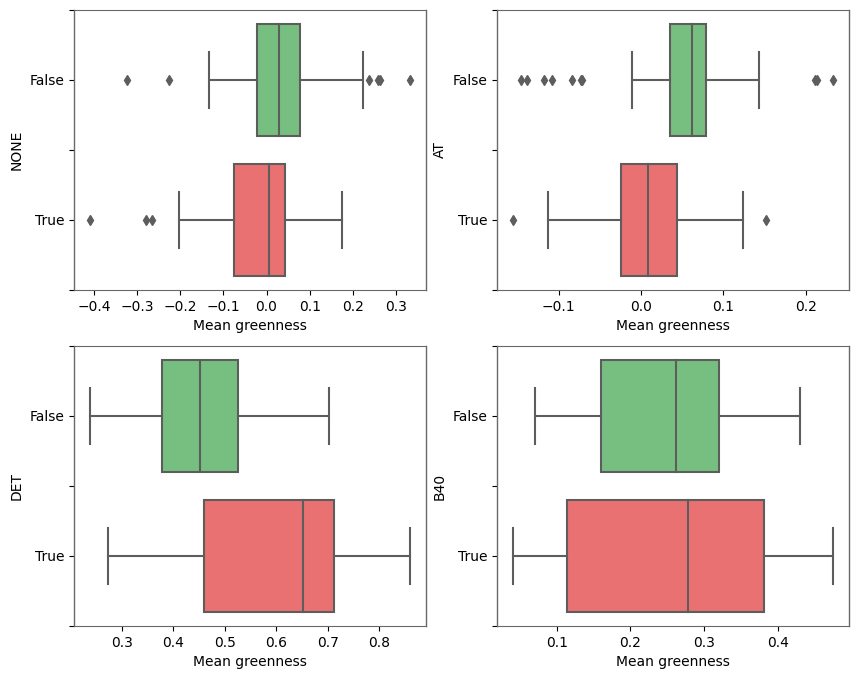

In [601]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

ax1 = sns.boxplot(df, x="NONE", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[0,0])
ax2 = sns.boxplot(df, x="AT", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[0,1])
ax3 = sns.boxplot(df, x="DET", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[1,0])
ax4 = sns.boxplot(df, x="B40", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[1,1])

ax1.spines['bottom'].set_color('dimgrey')
ax1.spines['top'].set_color('dimgrey') 
ax1.spines['right'].set_color('dimgrey')
ax1.spines['right'].set_linewidth(1)
ax1.spines['left'].set_color('dimgrey')
ax1.spines['left'].set_lw(1)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.label.set_color('black')
ax1.set_ylabel('NONE')
ax1.set_xlabel('Mean greenness')
ax1.yaxis.label.set_color('black')
ax1.tick_params(colors='black', which='both', labelsize=10)

ax2.spines['bottom'].set_color('dimgrey')
ax2.spines['top'].set_color('dimgrey') 
ax2.spines['right'].set_color('dimgrey')
ax2.spines['right'].set_linewidth(1)
ax2.spines['left'].set_color('dimgrey')
ax2.spines['left'].set_lw(1)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.label.set_color('black')
ax2.set_ylabel('AT')
ax2.set_xlabel('Mean greenness')
ax2.yaxis.label.set_color('black')
ax2.tick_params(colors='black', which='both', labelsize=10)

ax3.spines['bottom'].set_color('dimgrey')
ax3.spines['top'].set_color('dimgrey') 
ax3.spines['right'].set_color('dimgrey')
ax3.spines['right'].set_linewidth(1)
ax3.spines['left'].set_color('dimgrey')
ax3.spines['left'].set_lw(1)
ax3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.label.set_color('black')
ax3.set_ylabel('DET')
ax3.set_xlabel('Mean greenness')
ax3.yaxis.label.set_color('black')
ax3.tick_params(colors='black', which='both', labelsize=10)

ax4.spines['bottom'].set_color('dimgrey')
ax4.spines['top'].set_color('dimgrey') 
ax4.spines['right'].set_color('dimgrey')
ax4.spines['right'].set_linewidth(1)
ax4.spines['left'].set_color('dimgrey')
ax4.spines['left'].set_lw(1)
ax4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.xaxis.set_major_locator(MultipleLocator(0.1))
ax4.xaxis.label.set_color('black')
ax4.set_ylabel('B40')
ax4.set_xlabel('Mean greenness')
ax4.yaxis.label.set_color('black')
ax4.tick_params(colors='black', which='both', labelsize=10)


plt.show()


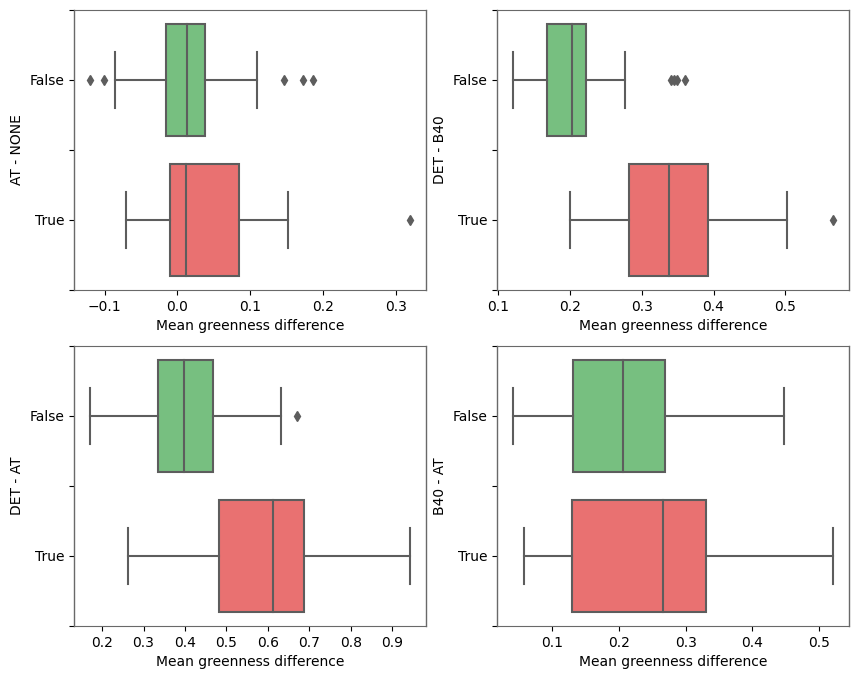

In [602]:
## 

fig, axs = plt.subplots(2,2, figsize=(10,8))

ax1 = sns.boxplot(df, x="AT - NONE", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[0,0])
ax2 = sns.boxplot(df, x="DET - B40", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[0,1])
ax3 = sns.boxplot(df, x="DET - AT", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[1,0])
ax4 = sns.boxplot(df, x="B40 - AT", y="Detection", palette=['#6BCB77', '#FD5D5D', 'black'], ax=axs[1,1])

ax1.spines['bottom'].set_color('dimgrey')
ax1.spines['top'].set_color('dimgrey') 
ax1.spines['right'].set_color('dimgrey')
ax1.spines['right'].set_linewidth(1)
ax1.spines['left'].set_color('dimgrey')
ax1.spines['left'].set_lw(1)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_major_locator(MultipleLocator(0.1))
ax1.xaxis.label.set_color('black')
ax1.set_ylabel('AT - NONE')
ax1.set_xlabel('Mean greenness difference')
ax1.yaxis.label.set_color('black')
ax1.tick_params(colors='black', which='both', labelsize=10)

ax2.spines['bottom'].set_color('dimgrey')
ax2.spines['top'].set_color('dimgrey') 
ax2.spines['right'].set_color('dimgrey')
ax2.spines['right'].set_linewidth(1)
ax2.spines['left'].set_color('dimgrey')
ax2.spines['left'].set_lw(1)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.label.set_color('black')
ax2.set_ylabel('DET - B40')
ax2.set_xlabel('Mean greenness difference')
ax2.yaxis.label.set_color('black')
ax2.tick_params(colors='black', which='both', labelsize=10)

ax3.spines['bottom'].set_color('dimgrey')
ax3.spines['top'].set_color('dimgrey') 
ax3.spines['right'].set_color('dimgrey')
ax3.spines['right'].set_linewidth(1)
ax3.spines['left'].set_color('dimgrey')
ax3.spines['left'].set_lw(1)
ax3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.xaxis.set_major_locator(MultipleLocator(0.1))
ax3.xaxis.label.set_color('black')
ax3.set_ylabel('DET - AT')
ax3.set_xlabel('Mean greenness difference')
ax3.yaxis.label.set_color('black')
ax3.tick_params(colors='black', which='both', labelsize=10)

ax4.spines['bottom'].set_color('dimgrey')
ax4.spines['top'].set_color('dimgrey') 
ax4.spines['right'].set_color('dimgrey')
ax4.spines['right'].set_linewidth(1)
ax4.spines['left'].set_color('dimgrey')
ax4.spines['left'].set_lw(1)
ax4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.xaxis.set_major_locator(MultipleLocator(0.1))
ax4.xaxis.label.set_color('black')
ax4.set_ylabel('B40 - AT')
ax4.set_xlabel('Mean greenness difference')
ax4.yaxis.label.set_color('black')
ax4.tick_params(colors='black', which='both', labelsize=10)

plt.show()


### 3D plots

#### Z3-Z4 vs Z3-Z2 hue Z3

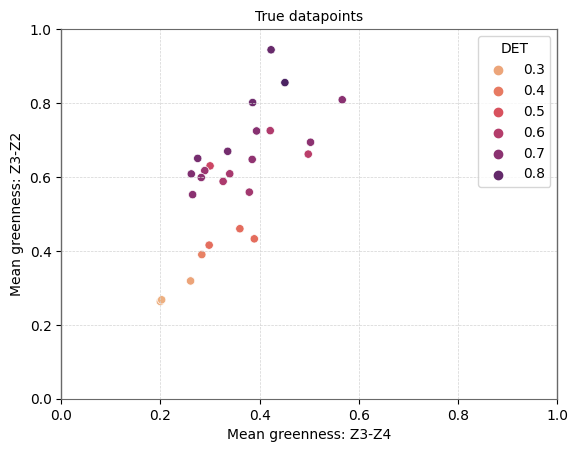

In [603]:
### True Z3-Z4 vs Z3-Z2
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'True'], x="DET - B40", y="DET - AT", hue='DET', palette="flare")


plt.title('True datapoints', fontsize=10)
plt.xlabel('Mean greenness: Z3-Z4', fontsize=10)
plt.ylabel('Mean greenness: Z3-Z2', fontsize=10)
plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)

plt.show()


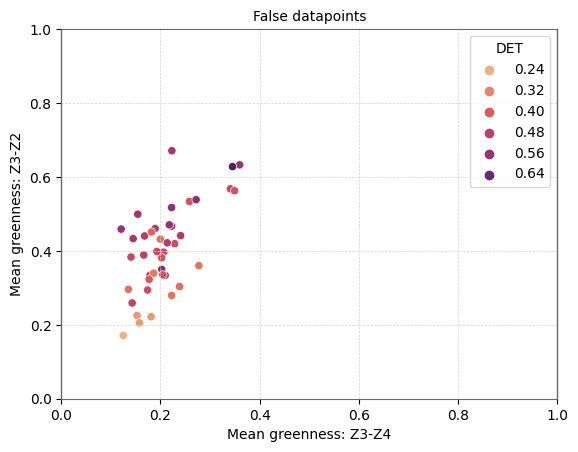

In [604]:
### False Z3-Z4 vs Z3-Z2
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'False'], x="DET - B40", y="DET - AT", hue='DET', palette="flare")

plt.title('False datapoints', fontsize=10)
plt.xlabel('Mean greenness: Z3-Z4', fontsize=10)
plt.ylabel('Mean greenness: Z3-Z2', fontsize=10)

plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
plt.show()


#### Z3-Z4 vs Z4-Z2 hue Z4

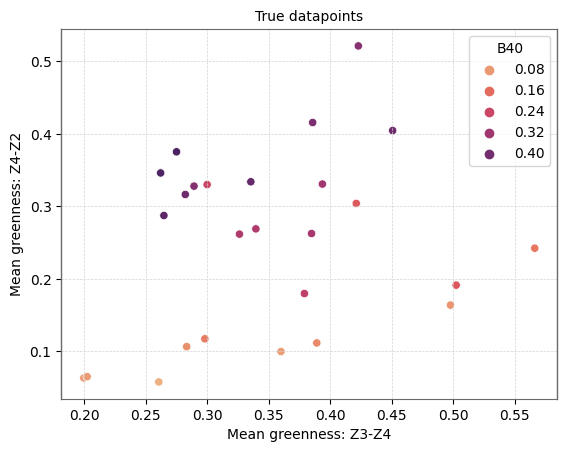

In [605]:
### True Z3-Z4 vs Z4-Z2
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'True'], x="DET - B40", y="B40 - AT", hue="B40", palette="flare")

plt.title('True datapoints', fontsize=10)
plt.xlabel('Mean greenness: Z3-Z4', fontsize=10)
plt.ylabel('Mean greenness: Z4-Z2', fontsize=10)

plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.set_xlim()
ax.set_ylim()
ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
plt.show()

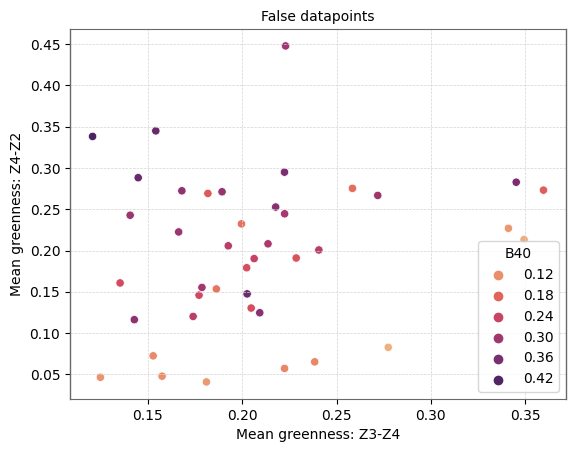

In [606]:
### False Z3-Z4 vs Z4-Z2
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'False'], x="DET - B40", y="B40 - AT", hue="B40", palette="flare")

plt.title('False datapoints', fontsize=10)
plt.xlabel('Mean greenness: Z3-Z4', fontsize=10)
plt.ylabel('Mean greenness: Z4-Z2', fontsize=10)

plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
plt.show()

#### Z2-Z1 vs Z3-Z2 hue Z4

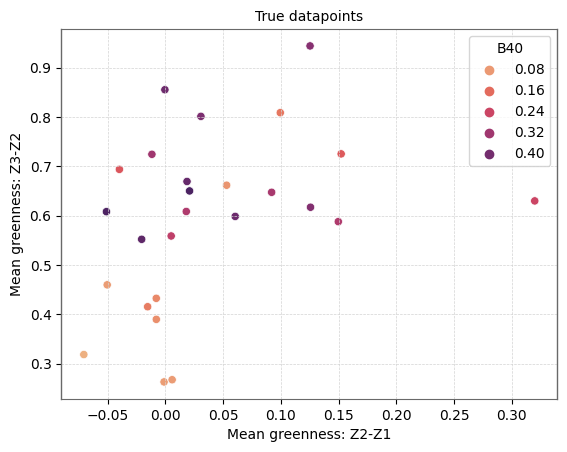

In [607]:
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'True'], x="AT - NONE", y="DET - AT", hue="B40", palette="flare")

plt.title('True datapoints', fontsize=10)
plt.xlabel('Mean greenness: Z2-Z1', fontsize=10)
plt.ylabel('Mean greenness: Z3-Z2', fontsize=10)

plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
plt.show()

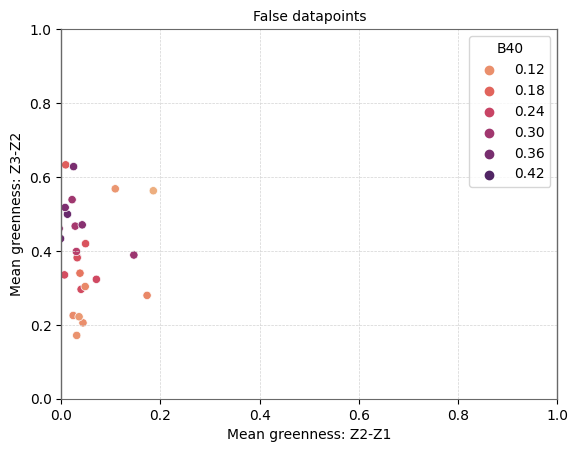

In [693]:
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'False'], x="AT - NONE", y="DET - AT", hue="B40", palette="flare")

plt.title('False datapoints', fontsize=10)
plt.xlabel('Mean greenness: Z2-Z1', fontsize=10)
plt.ylabel('Mean greenness: Z3-Z2', fontsize=10)

plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
plt.show()

#### Test 4D

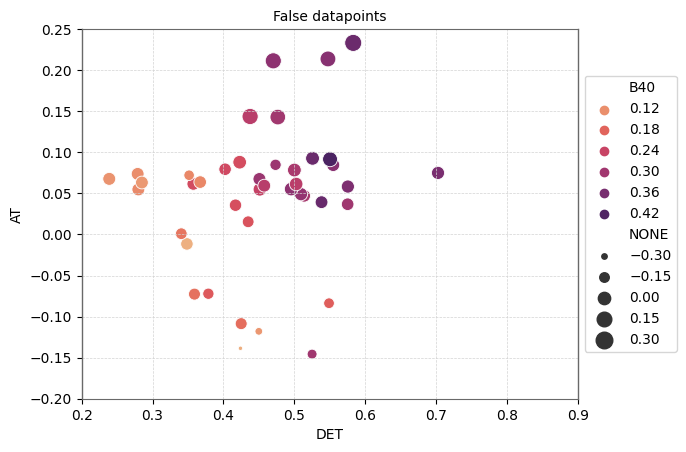

In [708]:
ax = sns.scatterplot(data=df.loc[df['Detection'] == 'False'], x="DET", y="AT", hue='B40', size='NONE', sizes=(10,150), palette="flare")

plt.title('False datapoints', fontsize=10)
#plt.xlabel('Z2', fontsize=10)
#plt.ylabel('Z3', fontsize=10)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.set_xlim([0.2, 0.9])
ax.set_ylim([-0.2, 0.25])


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=10)
plt.show()

### Heatmap

/var/folders/bs/rjz55_zs4rncnjv_rr32wdg40000gn/T/ipykernel_59059/1960592172.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidth=.5, cmap='bwr')


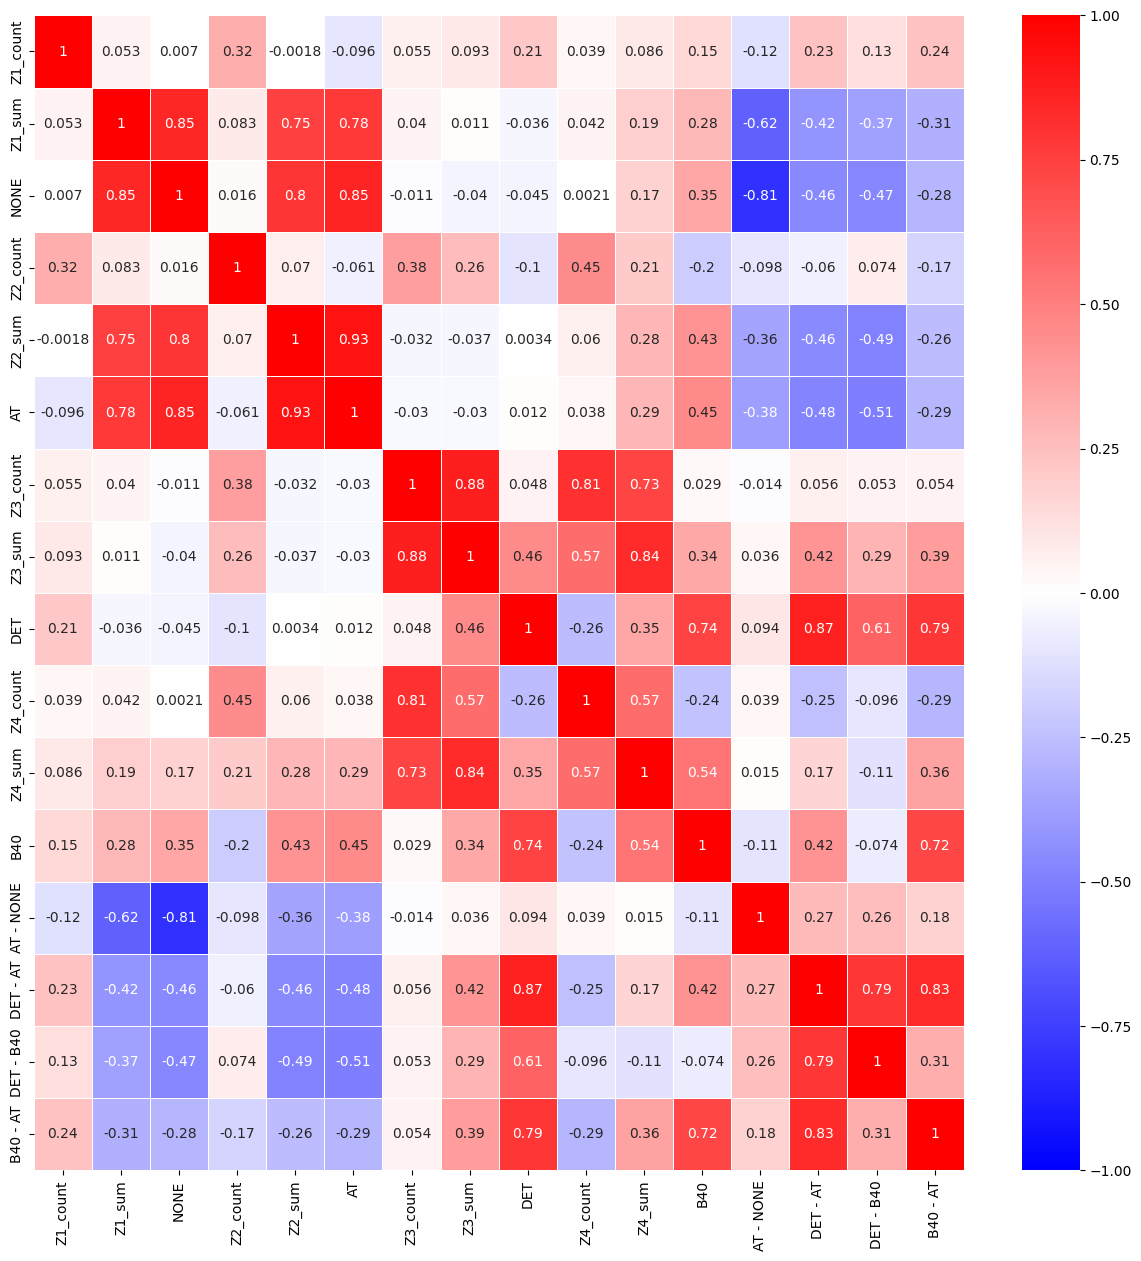

In [610]:
fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidth=.5, cmap='bwr')

### High-Influential DATAPOINTS

##### High-influental datapoints

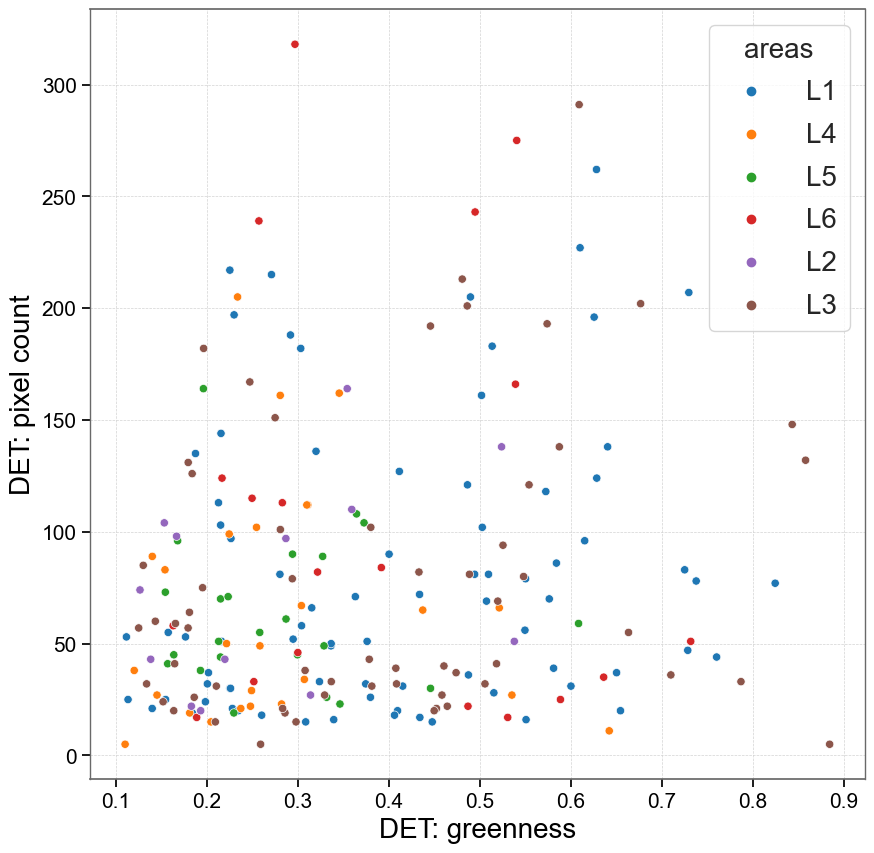

In [953]:
l_091219 = pd.read_excel('highinfluential_dp.xlsx')


fig, ax = plt.subplots(figsize=(10,10))

with sns.color_palette("tab10"):
    ax = sns.scatterplot(data=l_091219, x="z3_mean", hue='areas', y="z3_count")

plt.title('')
plt.xlabel('DET: greenness', fontsize=20)
plt.ylabel('DET: pixel count', fontsize=20)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(color ='lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=15)
plt.setp(ax.get_legend().get_texts(), fontsize='20') 
plt.setp(ax.get_legend().get_title(), fontsize='20') 
plt.show()





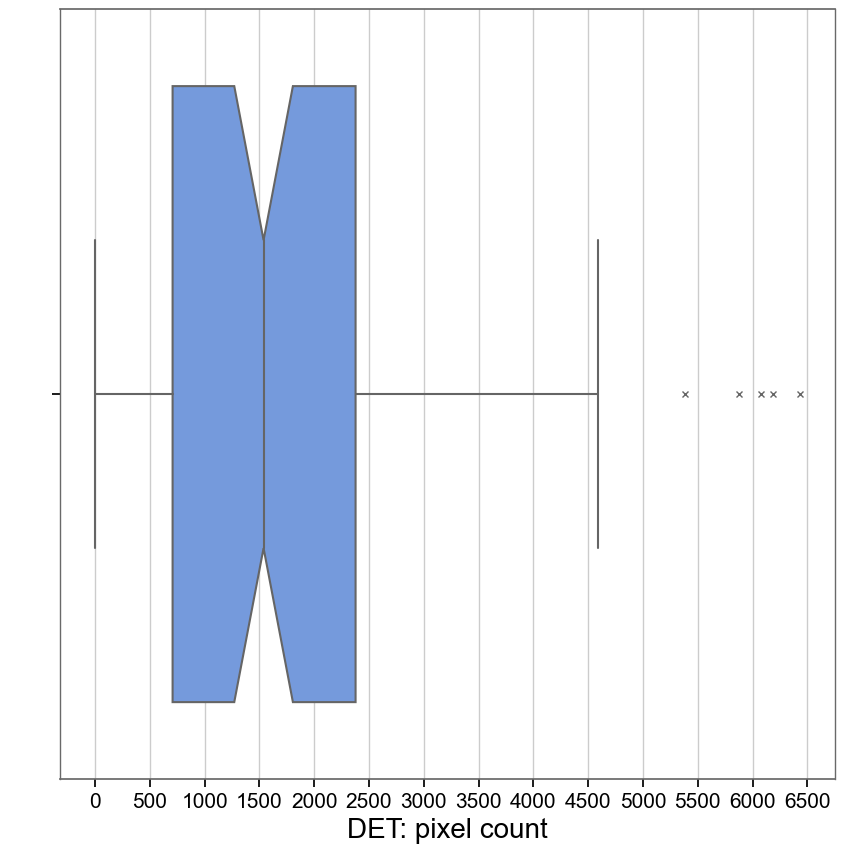

In [958]:

fig, ax = plt.subplots(figsize=(15,10))

with sns.color_palette("tab10"):
    ax = sns.boxplot(data=df_HIDP, x='Z3_count', color='cornflowerblue', notch=True, flierprops={"marker": "x"})

#plt.title('T1:20191209', fontsize=10)
plt.xlabel('DET: pixel count', fontsize=20)
#plt.ylabel('No. datapoints', fontsize=10)


#plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)
ax.xaxis.grid(True)
ax.set_ylabel(' ')
ax.set_axisbelow(True)

ax.xaxis.set_major_locator(MultipleLocator(500))


ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=20)
plt.show()

### Including HIDP

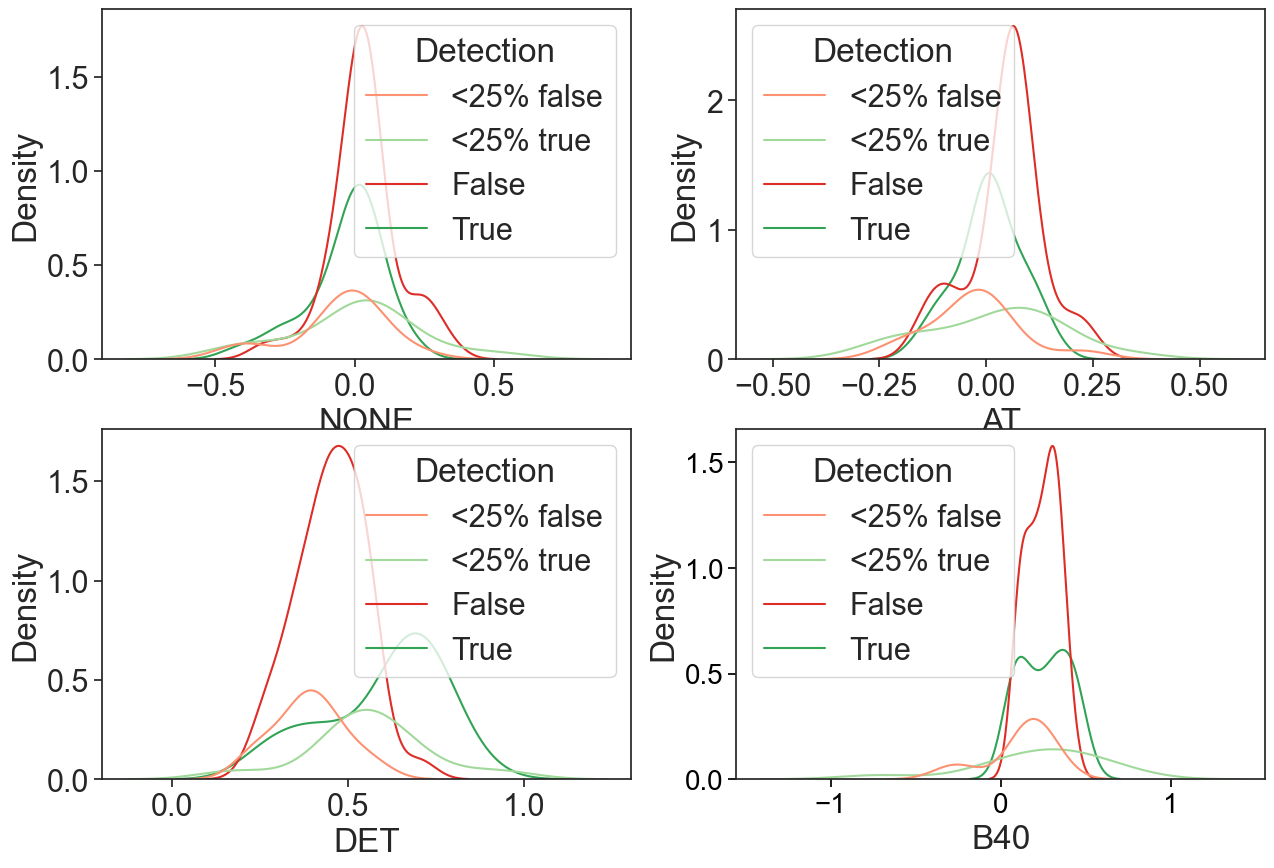

In [965]:
fig, axs = plt.subplots(2,2, figsize=(15,10))

ax = sns.kdeplot(data=df_HIDP, x='NONE', hue='Detection', ax=axs[0,0], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])
ax = sns.kdeplot(data=df_HIDP, x='AT', hue='Detection', ax=axs[0,1], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])
ax = sns.kdeplot(data=df_HIDP, x='DET', hue='Detection', ax=axs[1,0], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])
ax = sns.kdeplot(data=df_HIDP, x='B40', hue='Detection', ax=axs[1,1], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])

ax.tick_params(colors='black', which='both', labelsize=20)

plt.show()

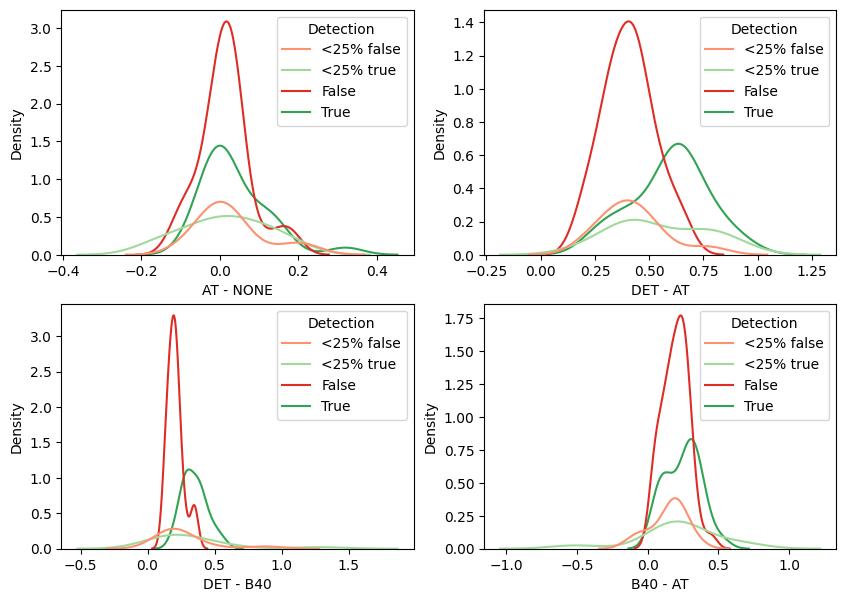

In [620]:
fig, axs = plt.subplots(2,2, figsize=(10,7))

ax = sns.kdeplot(data=df_HIDP, x='AT - NONE', hue='Detection', ax=axs[0,0], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])
ax = sns.kdeplot(data=df_HIDP, x='DET - AT', hue='Detection', ax=axs[0,1], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])
ax = sns.kdeplot(data=df_HIDP, x='DET - B40', hue='Detection', ax=axs[1,0], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])
ax = sns.kdeplot(data=df_HIDP, x='B40 - AT', hue='Detection', ax=axs[1,1], palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])

plt.show()

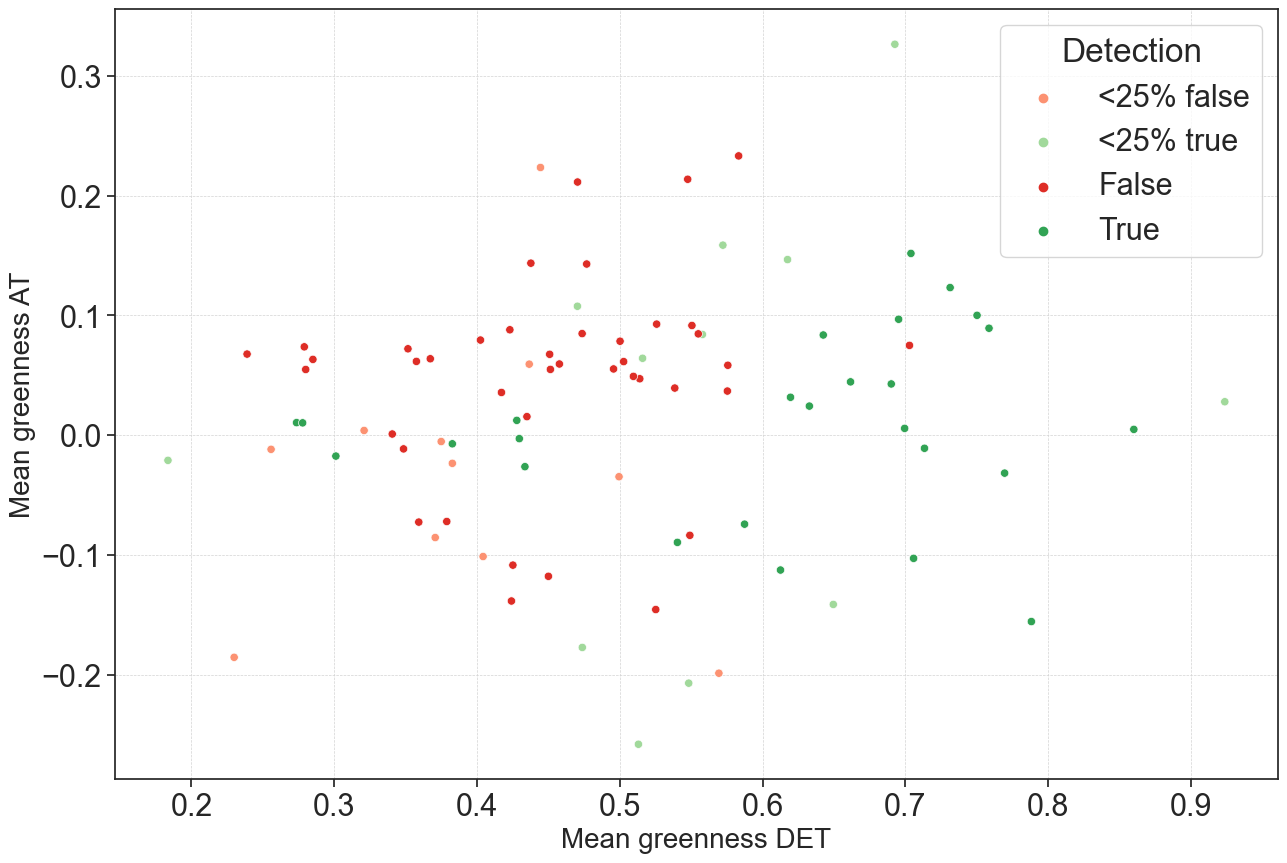

In [967]:
fig, axs = plt.subplots(figsize=(15,10))

ax1 = sns.scatterplot(data=df_HIDP, x="DET", y="AT", hue='Detection', palette=['#fc9272','#a1d99b', '#de2d26', '#31a354'])

#plt.title('Hei', fontsize=10)
plt.xlabel('Mean greenness DET', fontsize=20)
plt.ylabel('Mean greenness AT', fontsize=20)


plt.grid(color = 'lightgrey', linestyle = '--', linewidth = 0.5, zorder=1)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_lw(1)

ax.xaxis.label.set_color('black')
ax.yaxis.label.set_color('black')
ax.tick_params(colors='black', which='both', labelsize=20)
plt.show()

#The removed datapoints are mainly affected in DET and B40. This exampel shows which points are removed. 

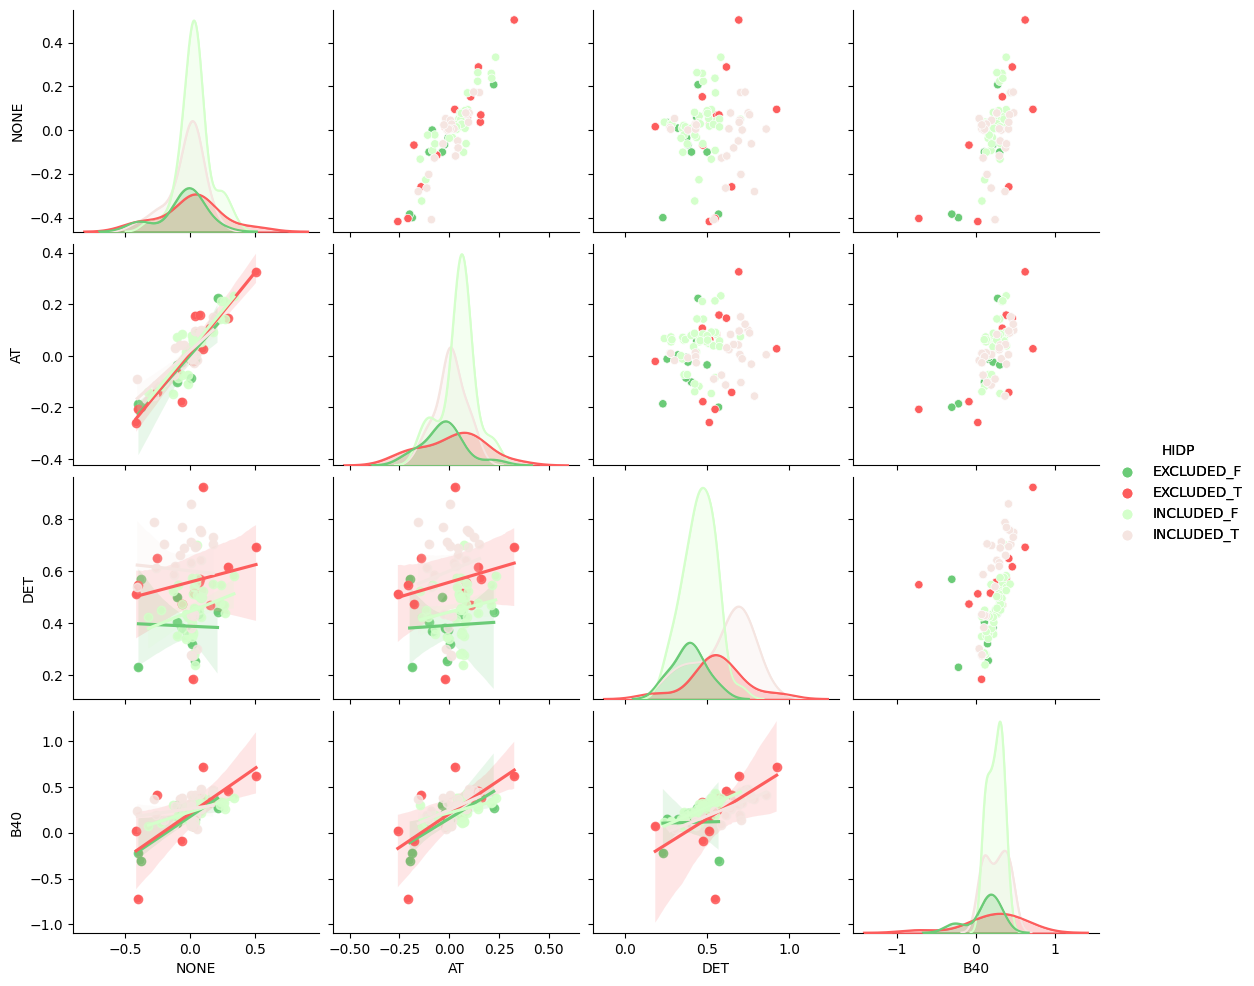

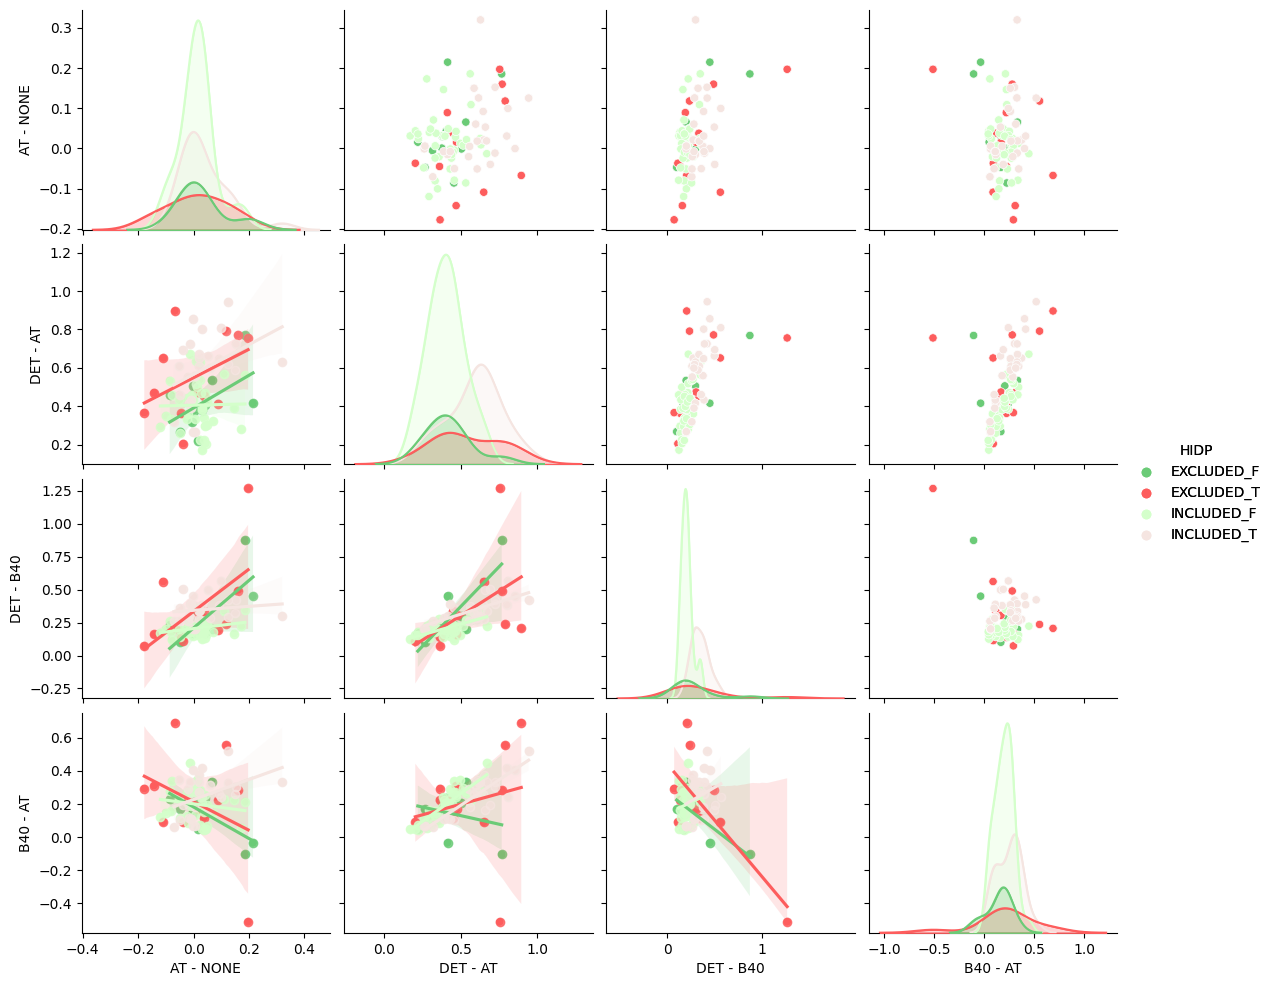

In [615]:
p = sns.pairplot(df_HIDP, hue='HIDP', vars=v1, palette=['#6BCB77','#FD5D5D', '#D4FFCB', '#F5E5E1'])
p.map_diag(sns.kdeplot)
p.map_lower(sns.regplot)
p.map_upper(sns.scatterplot)
p.add_legend()
p.tick_params(axis='both')

plt.show()

p = sns.pairplot(df_HIDP, hue='HIDP', vars=v2, palette=['#6BCB77','#FD5D5D', '#D4FFCB', '#F5E5E1'])
p.map_diag(sns.kdeplot)
p.map_lower(sns.regplot)
p.map_upper(sns.scatterplot)
p.add_legend()
p.tick_params(axis='both')

plt.show()

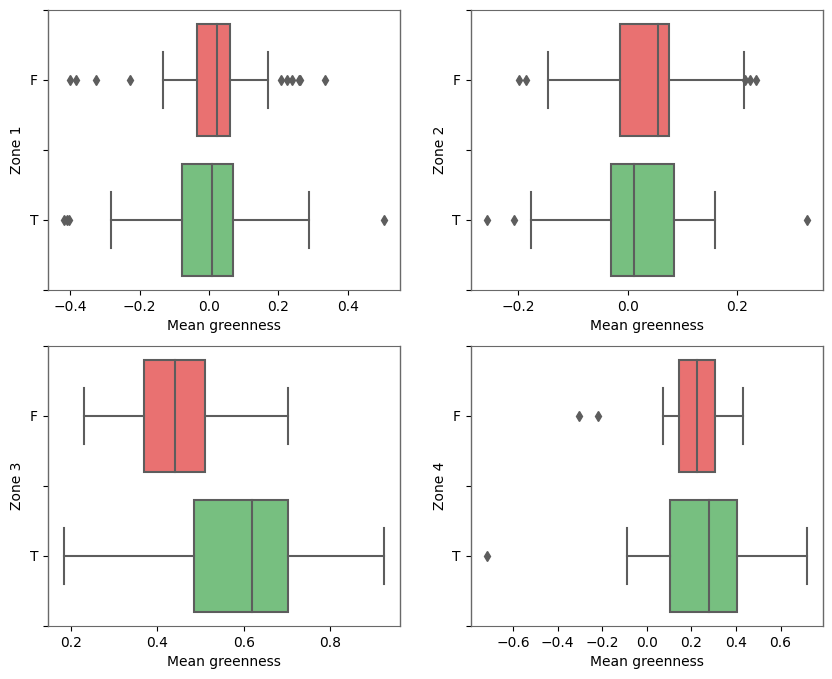

In [616]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

ax1 = sns.boxplot(df_w, x="Z1", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[0,0])
ax2 = sns.boxplot(df_w, x="Z2", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[0,1])
ax3 = sns.boxplot(df_w, x="Z3", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[1,0])
ax4 = sns.boxplot(df_w, x="Z4", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[1,1])

ax1.spines['bottom'].set_color('dimgrey')
ax1.spines['top'].set_color('dimgrey') 
ax1.spines['right'].set_color('dimgrey')
ax1.spines['right'].set_linewidth(1)
ax1.spines['left'].set_color('dimgrey')
ax1.spines['left'].set_lw(1)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.label.set_color('black')
ax1.set_ylabel('Zone 1')
ax1.set_xlabel('Mean greenness')
ax1.yaxis.label.set_color('black')
ax1.tick_params(colors='black', which='both', labelsize=10)

ax2.spines['bottom'].set_color('dimgrey')
ax2.spines['top'].set_color('dimgrey') 
ax2.spines['right'].set_color('dimgrey')
ax2.spines['right'].set_linewidth(1)
ax2.spines['left'].set_color('dimgrey')
ax2.spines['left'].set_lw(1)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.label.set_color('black')
ax2.set_ylabel('Zone 2')
ax2.set_xlabel('Mean greenness')
ax2.yaxis.label.set_color('black')
ax2.tick_params(colors='black', which='both', labelsize=10)

ax3.spines['bottom'].set_color('dimgrey')
ax3.spines['top'].set_color('dimgrey') 
ax3.spines['right'].set_color('dimgrey')
ax3.spines['right'].set_linewidth(1)
ax3.spines['left'].set_color('dimgrey')
ax3.spines['left'].set_lw(1)
ax3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.xaxis.set_major_locator(MultipleLocator(0.2))
ax3.xaxis.label.set_color('black')
ax3.set_ylabel('Zone 3')
ax3.set_xlabel('Mean greenness')
ax3.yaxis.label.set_color('black')
ax3.tick_params(colors='black', which='both', labelsize=10)

ax4.spines['bottom'].set_color('dimgrey')
ax4.spines['top'].set_color('dimgrey') 
ax4.spines['right'].set_color('dimgrey')
ax4.spines['right'].set_linewidth(1)
ax4.spines['left'].set_color('dimgrey')
ax4.spines['left'].set_lw(1)
ax4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.xaxis.set_major_locator(MultipleLocator(0.2))
ax4.xaxis.label.set_color('black')
ax4.set_ylabel('Zone 4')
ax4.set_xlabel('Mean greenness')
ax4.yaxis.label.set_color('black')
ax4.tick_params(colors='black', which='both', labelsize=10)


plt.show()


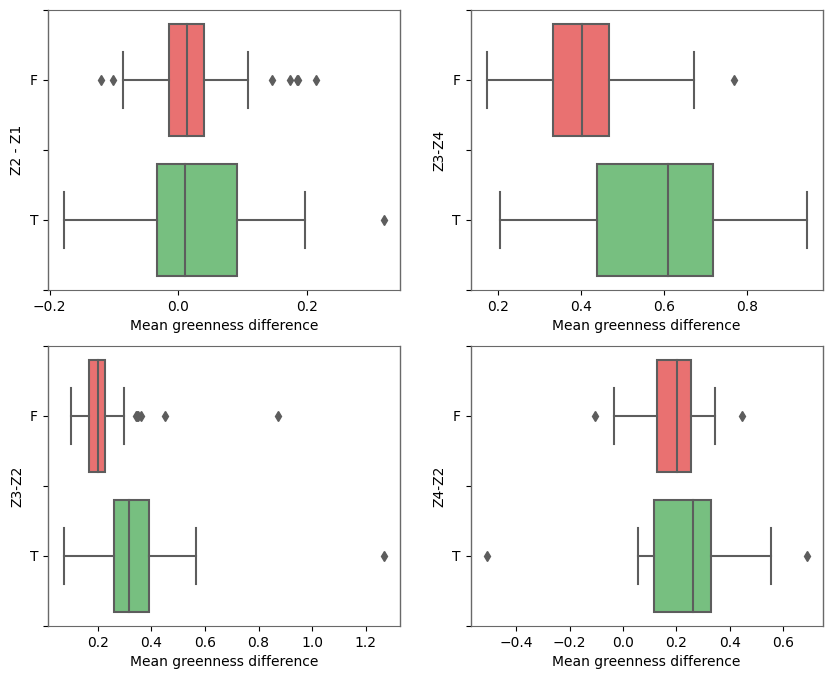

In [617]:
fig, axs = plt.subplots(2,2, figsize=(10,8))

ax1 = sns.boxplot(df_w, x="Z2-Z1", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[0,0])
ax2 = sns.boxplot(df_w, x="Z3-Z2", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[0,1])
ax3 = sns.boxplot(df_w, x="Z3-Z4", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[1,0])
ax4 = sns.boxplot(df_w, x="Z4-Z2", y="Detection", palette=['#FD5D5D', '#6BCB77'], ax=axs[1,1])

ax1.spines['bottom'].set_color('dimgrey')
ax1.spines['top'].set_color('dimgrey') 
ax1.spines['right'].set_color('dimgrey')
ax1.spines['right'].set_linewidth(1)
ax1.spines['left'].set_color('dimgrey')
ax1.spines['left'].set_lw(1)
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.label.set_color('black')
ax1.set_ylabel('Z2 - Z1')
ax1.set_xlabel('Mean greenness difference')
ax1.yaxis.label.set_color('black')
ax1.tick_params(colors='black', which='both', labelsize=10)

ax2.spines['bottom'].set_color('dimgrey')
ax2.spines['top'].set_color('dimgrey') 
ax2.spines['right'].set_color('dimgrey')
ax2.spines['right'].set_linewidth(1)
ax2.spines['left'].set_color('dimgrey')
ax2.spines['left'].set_lw(1)
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.label.set_color('black')
ax2.set_ylabel('Z3-Z4')
ax2.set_xlabel('Mean greenness difference')
ax2.yaxis.label.set_color('black')
ax2.tick_params(colors='black', which='both', labelsize=10)

ax3.spines['bottom'].set_color('dimgrey')
ax3.spines['top'].set_color('dimgrey') 
ax3.spines['right'].set_color('dimgrey')
ax3.spines['right'].set_linewidth(1)
ax3.spines['left'].set_color('dimgrey')
ax3.spines['left'].set_lw(1)
ax3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.xaxis.set_major_locator(MultipleLocator(0.2))
ax3.xaxis.label.set_color('black')
ax3.set_ylabel('Z3-Z2')
ax3.set_xlabel('Mean greenness difference')
ax3.yaxis.label.set_color('black')
ax3.tick_params(colors='black', which='both', labelsize=10)

ax4.spines['bottom'].set_color('dimgrey')
ax4.spines['top'].set_color('dimgrey') 
ax4.spines['right'].set_color('dimgrey')
ax4.spines['right'].set_linewidth(1)
ax4.spines['left'].set_color('dimgrey')
ax4.spines['left'].set_lw(1)
ax4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.xaxis.set_major_locator(MultipleLocator(0.2))
ax4.xaxis.label.set_color('black')
ax4.set_ylabel('Z4-Z2')
ax4.set_xlabel('Mean greenness difference')
ax4.yaxis.label.set_color('black')
ax4.tick_params(colors='black', which='both', labelsize=10)

plt.show()


#### CASE STUDY Wet to dry L1 11/12/2019

In [692]:
Z1 = pd.read_csv(r'/Users/mariaflaten/Documents/UiO/MASTER/QIS-project/VS Code/CSV-zonalstatistics/CSV/stats_Z1_111219_A1_Lyngen.csv')
Z2 = pd.read_csv(r'/Users/mariaflaten/Documents/UiO/MASTER/QIS-project/VS Code/CSV-zonalstatistics/CSV/stats_Z2_111219_A1_Lyngen.csv')
Z3 = pd.read_csv(r'/Users/mariaflaten/Documents/UiO/MASTER/QIS-project/VS Code/CSV-zonalstatistics/CSV/stats_Z3_111219_A1_Lyngen.csv')
Z4 = pd.read_csv(r'/Users/mariaflaten/Documents/UiO/MASTER/QIS-project/VS Code/CSV-zonalstatistics/CSV/stats_Z4_Z3_111219_A1_Lyngen.csv')

cols = ['_count', '_sum']

#print(Z3[cols].sum())

NONE = 41936.51586/125590.00000
AT = 118900.232810/509826.057649


DET =  list(Z3["_mean"])
B40 = list(Z4["_mean"])


DET_mean =  904.073697/1550.000000
B40_mean = 698.122136/1834.000000


print(NONE, AT, DET_mean, B40_mean)
print(AT-NONE, DET_mean-AT, DET_mean-B40_mean, B40_mean-AT)

0.33391604315630224 0.23321725326926945 0.5832733529032258 0.3806554721919302
-0.10069878988703279 0.35005609963395634 0.2026178807112956 0.14743821892266074


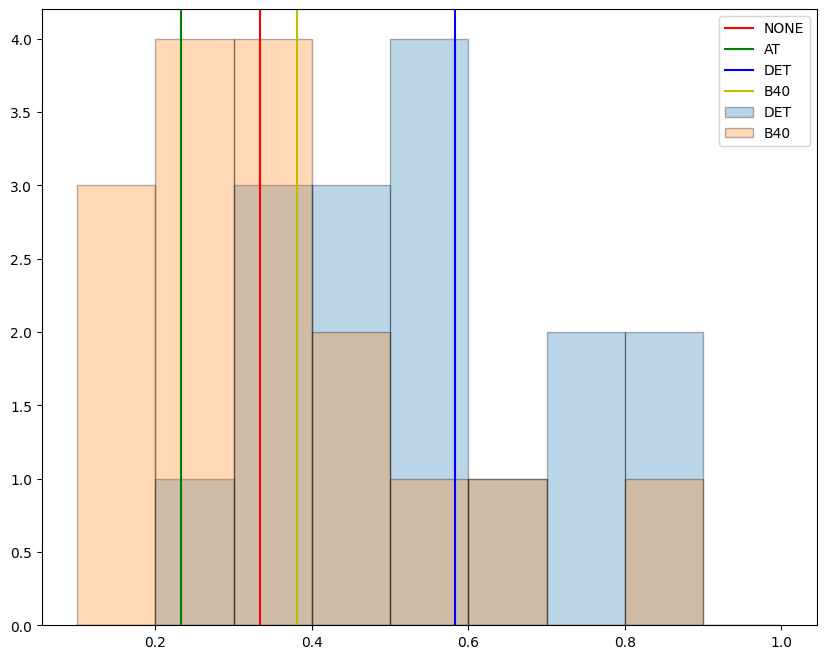

In [687]:
fig, ax = plt.subplots(figsize=(10,8))

plt.axvline(NONE, color = 'r', linestyle = '-', label="NONE")
plt.axvline(AT, color = 'g', linestyle = '-', label='AT')
plt.axvline(DET_mean, color = 'b', linestyle = '-', label="DET")
plt.axvline(B40_mean, color = 'y', linestyle = '-', label='B40')

ax.hist(DET, bins = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1], alpha=0.3, label="DET", edgecolor='black')
ax.hist(B40, bins = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1], alpha=0.3, label="B40", edgecolor='black')


plt.legend()



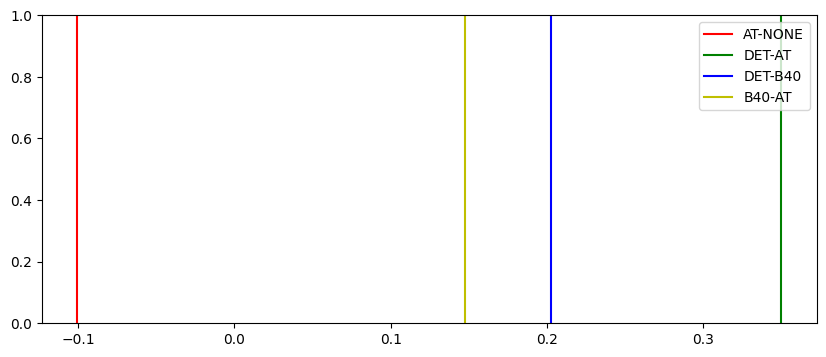

In [690]:
fig, ax = plt.subplots(figsize=(10,4))

plt.axvline(AT-NONE, color = 'r', linestyle = '-', label="AT-NONE")
plt.axvline(DET_mean-AT, color = 'g', linestyle = '-', label='DET-AT')
plt.axvline(DET_mean-B40_mean, color = 'b', linestyle = '-', label="DET-B40")
plt.axvline(B40_mean-AT, color = 'y', linestyle = '-', label='B40-AT')

#ax.hist(DET, bins = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1], alpha=0.3, label="DET", edgecolor='black')
#ax.hist(B40, bins = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1], alpha=0.3, label="B40", edgecolor='black')


plt.legend()



### Case studies: Testdataset vs. zonal contrast


<function matplotlib.pyplot.show(close=None, block=None)>

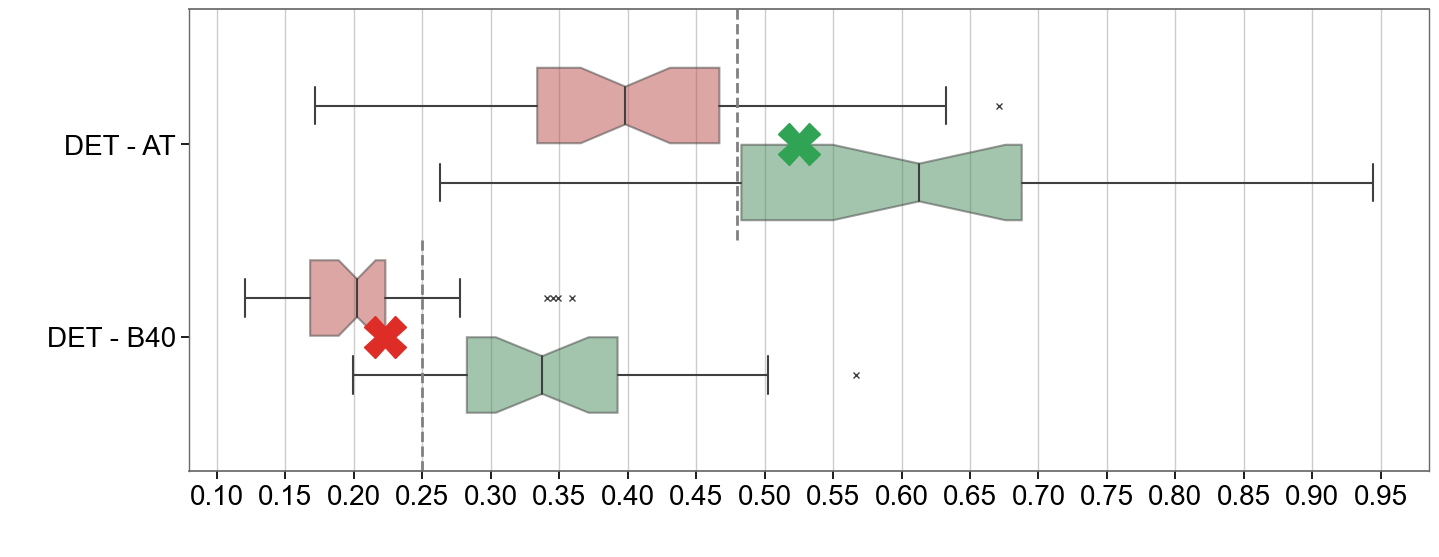

In [939]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(data=df_box_two, x='Mean greenness', y="Zone", hue="Detection", palette=['#de2d26', '#31a354'], saturation=0.6, boxprops=dict(alpha=.5), notch=True, flierprops={"marker": "x"})

ax.axvline(x=0.25, ymax=0.5, c='grey', linestyle='--',linewidth=2)
ax.axvline(x=0.48, ymin=0.5, c='grey', linestyle='--',linewidth=2)

#plt.text(x=0.25, y=1.5, s='0.25')
#plt.text(x=0.48, y=1.5, s='0.48')

#A CASE
#L1 310519_0511
#ax.plot(0.711574195, 0, label='', color='#31a354', marker='X', markersize=30)
#ax.plot(0.099242173, 1, color='#de2d26', marker='X', markersize=30)

#R3 140220_0554
#ax.plot(0.324855561, 0, label='', color='#de2d26', marker='X', markersize=30)
#ax.plot(0.195208898, 1, color='#de2d26', marker='X', markersize=30)

#R3 090419_1703
#ax.plot(0.188249527, 0, label='', color='#de2d26', marker='X', markersize=30)
#ax.plot(0.217767099, 1, color='#de2d26', marker='X', markersize=30)




#B-CASES
#L1 300420_0519
ax.plot(0.525312485, 0, label='', color='#31a354', marker='X', markersize=30)
ax.plot(0.22249943, 1, color='#de2d26', marker='X', markersize=30)

#L1 160119_1607
#ax.plot(0.46520007, 0, label='',color='#de2d26', marker='X', markersize=30)
#ax.plot(0.277295981, 1, color='#31a354', marker='X', markersize=30)

#R3 150520_0546
#ax.plot(0.776490517, 0, label='',color='#31a354', marker='X', markersize=30)
#ax.plot(0.393116779, 1, color='#31a354', marker='X', markersize=30)

#ax.legend(loc="center left", bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1)

ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey') 
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_linewidth(1)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(0.05))
#ax.axhline(y=1, linestyle='--',linewidth=4)
ax.xaxis.label.set_color('black')
ax.tick_params(colors='black', labelsize=20)
ax.xaxis.grid(True)
ax.set_ylabel(' ')
#ax.set_axisbelow(True)
#sns.set_style('ticks')

ax.set_xlabel(' ')
plt.legend([],[], frameon=False)

#plt.rcParams.update({'font.size': 15})


plt.show